In [1]:
import quandl
import pandas as pd
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import hypertools as hyp
from datetime import datetime, timedelta

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# 1. Collect the Data

### _Spot Exchange Rates_

#### Fetched from Quandl python API

U.S. Dollars per 'currency'

In [2]:
eurusd = quandl.get("FED/RXI_US_N_B_EU", authtoken="9jpLoG3FHVZqzxGaShTM")
eurusd = eurusd.rename(columns={'Value':'eurusd'})
gbpusd = quandl.get("FED/RXI_US_N_B_UK", authtoken="9jpLoG3FHVZqzxGaShTM")
gbpusd = gbpusd.rename(columns={'Value':'gbpusd'})
usdjpy = quandl.get("FED/RXI_N_B_JA", authtoken="9jpLoG3FHVZqzxGaShTM")
usdjpy = usdjpy.rename(columns={'Value':'usdjpy'})

### _LIBOR_

imported from https://fred.stlouisfed.org/categories/33003
(Federal reserve bank of St.Louis Economic Research)

In [3]:
# 1 month
libor1m_usd = pd.read_csv('/home/gio/findata/libor/USD1MTD156N.csv', header=1, index_col=0, names=['libor 1m usd'], na_values=['.'], parse_dates=True)
libor1m_eur = pd.read_csv('/home/gio/findata/libor/EUR1MTD156N.csv', header=1, index_col=0, names=['libor 1m eur'], na_values=['.'], parse_dates=True)
libor1m_gbp = pd.read_csv('/home/gio/findata/libor/GBP1MTD156N.csv', header=1, index_col=0, names=['libor 1m gbp'], na_values=['.'], parse_dates=True)
libor1m_jpy = pd.read_csv('/home/gio/findata/libor/JPY1MTD156N.csv', header=1, index_col=0, names=['libor 1m jpy'], na_values=['.'], parse_dates=True)
#libor1m_gbp = df = pd.read_excel('/home/gio/findata/libor/GBP1MTD156N.xls', header=10, index_col=0, names=['libor 1m gbp'])

# 3 months
libor3m_usd = pd.read_csv('/home/gio/findata/libor/USD3MTD156N.csv', header=1, index_col=0, names=['libor 3m usd'], na_values=['.'], parse_dates=True)
libor3m_eur = pd.read_csv('/home/gio/findata/libor/EUR3MTD156N.csv', header=1, index_col=0, names=['libor 3m eur'], na_values=['.'], parse_dates=True)
libor3m_gbp = pd.read_csv('/home/gio/findata/libor/GBP3MTD156N.csv', header=1, index_col=0, names=['libor 3m gbp'], na_values=['.'], parse_dates=True)
libor3m_jpy = pd.read_csv('/home/gio/findata/libor/JPY3MTD156N.csv', header=1, index_col=0, names=['libor 3m jpy'], na_values=['.'], parse_dates=True)

#1 week
libor1w_usd = pd.read_csv('/home/gio/findata/libor/USD1WKD156N.csv', header=1, index_col=0, names=['libor 1w usd'], na_values=['.'], parse_dates=True)
libor1w_eur = pd.read_csv('/home/gio/findata/libor/EUR1WKD156N.csv', header=1, index_col=0, names=['libor 1w eur'], na_values=['.'], parse_dates=True)
libor1w_gbp = pd.read_csv('/home/gio/findata/libor/GBP1WKD156N.csv', header=1, index_col=0, names=['libor 1w gbp'], na_values=['.'], parse_dates=True)
libor1w_jpy = pd.read_csv('/home/gio/findata/libor/JPY1WKD156N.csv', header=1, index_col=0, names=['libor 1w jpy'], na_values=['.'], parse_dates=True)

### _Forward Exchange Rates_

**Fetched from QUANDL python API : Historical CME Futures Prices**: 
https://www.quandl.com/data/CME-Chicago-Mercantile-Exchange-Futures-Data

Example:

ECH2009 => Euro FX Futures, expiration 18/19 **March** 2009

ECM2009 => Euro FX Futures, expiration 18/19 **June** 2009

ECU2009 => Euro FX Futures, expiration 18/19 **September** 2009

ECZ2009 => Euro FX Futures, expiration 18/19 **December** 2009

In [4]:
# load future contracts into 4 different pandas df 
# according to the 4 different seasonal maturities

####################################
# fw GBP_USD
# fetch the first year of quotations
fw_gbpusd_mar = quandl.get("CME/BPH1980", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
fw_gbpusd_jun = quandl.get("CME/BPM1980", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
fw_gbpusd_sep = quandl.get("CME/BPU1980", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
fw_gbpusd_dec = quandl.get("CME/BPZ1980", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
# iterate the quandl commands to fetch forward contracts
for i in np.arange(1981,2018):
    mar = "CME/BPH"+str(i)
    jun = "CME/BPM"+str(i)
    sep = "CME/BPU"+str(i)
    dec = "CME/BPZ"+str(i)
    fw_gbpusd_mar = pd.concat([fw_gbpusd_mar, quandl.get(mar, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
    fw_gbpusd_jun = pd.concat([fw_gbpusd_jun, quandl.get(jun, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
    fw_gbpusd_sep = pd.concat([fw_gbpusd_sep, quandl.get(sep, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
    fw_gbpusd_dec = pd.concat([fw_gbpusd_dec, quandl.get(dec, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
# transform time series obj into pandas dfs
fw_gbpusd_mar = pd.DataFrame(fw_gbpusd_mar)
fw_gbpusd_jun = pd.DataFrame(fw_gbpusd_jun)
fw_gbpusd_sep = pd.DataFrame(fw_gbpusd_sep)
fw_gbpusd_dec = pd.DataFrame(fw_gbpusd_dec)
# rename columns
fw_gbpusd_mar.columns = ['fw']
fw_gbpusd_jun.columns = ['fw']
fw_gbpusd_sep.columns = ['fw']
fw_gbpusd_dec.columns = ['fw']

In [5]:
###################################
# fw EUR_USD
# fetch the first year of quotations
fw_eurusd_mar = quandl.get("CME/ECH1999", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
fw_eurusd_jun = quandl.get("CME/ECM1999", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
fw_eurusd_sep = quandl.get("CME/ECU1999", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
fw_eurusd_dec = quandl.get("CME/ECZ1999", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
# iterate the quandl commands to fetch forward contracts
for i in np.arange(2000,2018):
    mar = "CME/ECH"+str(i)
    jun = "CME/ECM"+str(i)
    sep = "CME/ECU"+str(i)
    dec = "CME/ECZ"+str(i)
    fw_eurusd_mar = pd.concat([fw_eurusd_mar, quandl.get(mar, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
    fw_eurusd_jun = pd.concat([fw_eurusd_jun, quandl.get(jun, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
    fw_eurusd_sep = pd.concat([fw_eurusd_sep, quandl.get(sep, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
    fw_eurusd_dec = pd.concat([fw_eurusd_dec, quandl.get(dec, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
# transform time series objs into pandas dfs
fw_eurusd_mar = pd.DataFrame(fw_eurusd_mar)
fw_eurusd_jun = pd.DataFrame(fw_eurusd_jun)
fw_eurusd_sep = pd.DataFrame(fw_eurusd_sep)
fw_eurusd_dec = pd.DataFrame(fw_eurusd_dec)
# rename columns
fw_eurusd_mar.columns = ['fw']
fw_eurusd_jun.columns = ['fw']
fw_eurusd_sep.columns = ['fw']
fw_eurusd_dec.columns = ['fw']

In [15]:
####################################
# fw USD_JPY # NOTE: it must be converted using 10**6/fw to be in the form of the usual ex pair (USDJPY)
# fetch the first year of quotations
fw_usdjpy_mar = quandl.get("CME/JYH1980", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
fw_usdjpy_jun = quandl.get("CME/JYM1980", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
fw_usdjpy_sep = quandl.get("CME/JYU1980", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
fw_usdjpy_dec = quandl.get("CME/JYZ1980", authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]
# iterate the quandl commands to fetch forward contracts
for i in np.arange(1981,2018):
    mar = "CME/JYH"+str(i)
    jun = "CME/JYM"+str(i)
    sep = "CME/JYU"+str(i)
    dec = "CME/JYZ"+str(i)
    fw_usdjpy_mar = pd.concat([fw_usdjpy_mar, quandl.get(mar, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
    fw_usdjpy_jun = pd.concat([fw_usdjpy_jun, quandl.get(jun, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
    fw_usdjpy_sep = pd.concat([fw_usdjpy_sep, quandl.get(sep, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
    fw_usdjpy_dec = pd.concat([fw_usdjpy_dec, quandl.get(dec, authtoken="9jpLoG3FHVZqzxGaShTM")["Settle"]],
                            axis=0)
# transform time series obj into pandas dfs
fw_usdjpy_mar = pd.DataFrame(10**6/fw_usdjpy_mar)
fw_usdjpy_jun = pd.DataFrame(10**6/fw_usdjpy_jun)
fw_usdjpy_sep = pd.DataFrame(10**6/fw_usdjpy_sep)
fw_usdjpy_dec = pd.DataFrame(10**6/fw_usdjpy_dec)
# rename columns
fw_usdjpy_mar.columns = ['fw']
fw_usdjpy_jun.columns = ['fw']
fw_usdjpy_sep.columns = ['fw']
fw_usdjpy_dec.columns = ['fw']

In [16]:
# save into csv files as preventive measure, just in case quandl fails...I wouldn't know wherelse I could fetch these futures
fw_eurusd_mar.to_csv('/home/gio/findata/fw/fw_eurusd_mar')
fw_eurusd_jun.to_csv('/home/gio/findata/fw/fw_eurusd_jun')
fw_eurusd_sep.to_csv('/home/gio/findata/fw/fw_eurusd_sep')
fw_eurusd_dec.to_csv('/home/gio/findata/fw/fw_eurusd_dec')
fw_gbpusd_mar.to_csv('/home/gio/findata/fw/fw_gbpusd_mar')
fw_gbpusd_jun.to_csv('/home/gio/findata/fw/fw_gbpusd_jun')
fw_gbpusd_sep.to_csv('/home/gio/findata/fw/fw_gbpusd_sep')
fw_gbpusd_dec.to_csv('/home/gio/findata/fw/fw_gbpusd_dec')
fw_usdjpy_mar.to_csv('/home/gio/findata/fw/fw_usdjpy_mar')
fw_usdjpy_jun.to_csv('/home/gio/findata/fw/fw_usdjpy_jun')
fw_usdjpy_sep.to_csv('/home/gio/findata/fw/fw_usdjpy_sep')
fw_usdjpy_dec.to_csv('/home/gio/findata/fw/fw_usdjpy_dec')

In [4]:
# load from csv to spare time
fw_eurusd_mar=pd.read_csv('/home/gio/findata/fw/fw_eurusd_mar', index_col=0, parse_dates=True)
fw_eurusd_jun=pd.read_csv('/home/gio/findata/fw/fw_eurusd_jun',index_col=0, parse_dates=True)
fw_eurusd_sep=pd.read_csv('/home/gio/findata/fw/fw_eurusd_sep',index_col=0, parse_dates=True)
fw_eurusd_dec=pd.read_csv('/home/gio/findata/fw/fw_eurusd_dec',index_col=0, parse_dates=True)
fw_gbpusd_mar=pd.read_csv('/home/gio/findata/fw/fw_gbpusd_mar',index_col=0, parse_dates=True)
fw_gbpusd_jun=pd.read_csv('/home/gio/findata/fw/fw_gbpusd_jun',index_col=0, parse_dates=True)
fw_gbpusd_sep=pd.read_csv('/home/gio/findata/fw/fw_gbpusd_sep',index_col=0, parse_dates=True)
fw_gbpusd_dec=pd.read_csv('/home/gio/findata/fw/fw_gbpusd_dec',index_col=0, parse_dates=True)
fw_usdjpy_mar=pd.read_csv('/home/gio/findata/fw/fw_usdjpy_mar',index_col=0, parse_dates=True)
fw_usdjpy_jun=pd.read_csv('/home/gio/findata/fw/fw_usdjpy_jun',index_col=0, parse_dates=True)
fw_usdjpy_sep=pd.read_csv('/home/gio/findata/fw/fw_usdjpy_sep',index_col=0, parse_dates=True)
fw_usdjpy_dec=pd.read_csv('/home/gio/findata/fw/fw_usdjpy_dec',index_col=0, parse_dates=True)


#### _Build a pandas DataFrame with the data_

Here I define a new pandas df for each currency pair. The df is indexed by timedate, the columns contain the financial data I've previously loaded, less the forward exchange rates.

In [5]:
#EURUSD
df_eurusd = eurusd.join([libor1m_eur, libor1m_usd,
                         libor3m_eur, libor3m_usd,
                         libor1w_eur, libor1w_usd],how='outer')

df_eurusd = df_eurusd.ffill() # fill NA using the preceeding value
df_eurusd = df_eurusd.dropna(subset=['libor 1m usd', 'libor 1m eur'])

#GBPUSD
df_gbpusd = gbpusd.join([libor1m_gbp, libor1m_usd,
                         libor3m_gbp, libor3m_usd,
                         libor1w_gbp, libor1w_usd],how='outer')
df_gbpusd = df_gbpusd.ffill() # fill NA using the preceeding value
df_gbpusd = df_gbpusd.dropna(subset=['libor 1m usd', 'libor 1m gbp'])

#USDJPY
df_usdjpy = usdjpy.join([libor1m_jpy, libor1m_usd,
                         libor3m_jpy, libor3m_usd,
                         libor1w_jpy, libor1w_usd],how='outer')
df_usdjpy = df_usdjpy.ffill() # fill NA using the preceeding value
df_usdjpy = df_usdjpy.dropna(subset=['libor 1m usd', 'libor 1m jpy'])

In [6]:
#df.iloc[3000]
df_gbpusd.head(3)

,gbpusd,libor 1m gbp,libor 1m usd,libor 3m gbp,libor 3m usd,libor 1w gbp,libor 1w usd
1986-01-03,1.4380,11.8125,8.1250,11.8750,8.0625,NaN,NaN
1986-01-06,1.4355,11.7500,8.1875,11.9063,8.1250,NaN,NaN
1986-01-07,1.4395,11.7500,8.1250,12.0313,8.1250,NaN,NaN


***
***

# 2. Covered Interest Parity

It's the fundamental condition for which the returns of a deposit in a given currency and the return of *covered* deposits in a foreign currencies must hold (correct verb??) equal:

$1 + r_{usd} = (1 + r_{gbp})*\frac{F_{gbp/usd}}{E_{gbp/usd}} $ ,

where

$F_{gbp/usd}$= forward exchange rate GBP/USD

$E_{gbp/usd}$= spot exchange rate GBP/USD

r = interest rate in that currency


Often forward contract are freely bargained among the two parts of a transaction, nevertheless they take listed futures as reference.
Forward contracts imported from quandl databases have four seasonal maturities: annually the 16th of march, june, september and december. According to the day we're taking int consideration for the CIP verification, we need to think which forward quotation to use as benchmark. 

For computations, I'm using LIBOR as a measure of the interest rates paid by investing in a certain currency. The reason for adopting them instead of sovereign debt certificates (such as bonds and treasuries) relies in their nature: they're calculated and listed as a benchmark for mutual borrowing activities between banks\*. In a nutshell: they belong to the same professional hub of exchanges and they effectively include expectations of professionals in the banking sector on the risk of investing in a currency (we here omit these questions concerning past manipulations of Libor).

Another advantage of using LIBOR rates as benchmark is that I can assume to be an idealistic investment bank in London, able to lend and borrow currencies at those rate and I'll try to make arbitrage profits. In fact deviations from CIP could appear when deposits are held in different countries, among which one is thought to have a major default risk; or it could be also that one imposes restrictions on foreign currency circulation within national borders.


\*Libor is the major rate used to price debt stock. Libor is actually a set of several benchmarks that reflect the average interest rate at which large global banks can borrow from each other. There are a total of 150 Libor rates posted each day; interest rates are compiled for loans with 15 different maturities (or due dates) for each of 10 major currencies. Each morning, just before 11 a.m. Greenwich Mean Time, a group of major banks are asked the rate at which they would borrow funds from other banks. The banks confidentially send their results for each of the 15 loan maturities - ranging from overnight to one year - to the market intelligence firm Thomson Reuters. The organization throws out figures in the highest and lowest quartile and averages the remaining half.
Thomson Reuters publishes the resulting Libor rates, as well as all the contributing rates that the banks provide, every day by noon. 

## Explore deviations from CIP

The first step of my analysis is to measure historical daily deviations from covered interest parity. The reason is that every time this happens, supposing to be an investor able to lend/borrow at LIBOR rates I could be able to make arbirtrage profits. The deviation from CIP can be defined as:

$ CIP deviation = 1 + r_{usd} - (1 + r_{gbp})*\frac{F_{gbp/usd}}{E_{gbp/usd}}$

+ calculate USD investment returns

+ calculate GBP investment returns

+ apply the formula and store results into df's cip_deviation column


The trick here is that I have Libor rates for three different investment durations  (1week, 1month and 3months) and I have to combine them using financial mathematics to retrieve an estimation of the average interest rate one could obtain respectively to the next maturity of the forward exchange future contract. 

I've assumed that, when the forthcoming maturity is less than one month ahead, it was  better to consider the next one in time, instead of using the return of an a-few-weeks investment.

Here an explanation of the reasoning followed through the code below:

**for** every date **in** the df index**:**    

__ **if** date < 15th of January**:**

---> the forward exchange selected is the one with maturity 15th of March

---> investment_duration = 15th march - date (therefore the min duration is 2 months)

---> the final interest rate will be a combination of the 1week and 1month LIBORs

---> I define a first term = 2months during which libor_1month is applied

     # After that first term, until the maturity of the investment, libor_1week is used

---> r = ((1 + libor_1month)^2)(1 + libor_1week)^((maturity-first_term)/365)

__ **else if** date < 15th of February **:**

---> the forward exchange selected is the one with maturity 15th of March

---> investment_duration = 15th march - date (therefore the min duration is 1 month)

---> the final interest rate will be a combination of the 1week and 1month LIBORs

---> I define a first term = 1 month during which libor_1month is applied

     # After that first term, until the maturity of the investment, libor_1week is used

---> r=[(1 + libor_1month)*(1 + libor_1week)^((maturity-first_term)/365)

__ **else if** date < 15th of March **:**

---> the forward exchange selected is NOT the forthcoming one with maturity 15th of March
     but the following with maturity 15th of June.

---> investment_duration = 15th of June - date (therefore the min duration is 3 month)

---> the final interest rate will be a combination of the 1week and 3month LIBORs

---> I define a first term = 3 months during which libor_3month is applied

     # After that first term, until the maturity of the investment, libor_1week is used

---> r=[(1 + libor_3months)*(1 + libor_1week)^((maturity-first_term)/365)

...**And so on**


### But this operation can be generalized for any pair of currencies

Referring to the way CIP deviation has been previously expressed in terms of gbp/usd:

$ CIP deviation = 1 + r_{usd} - (1 + r_{gbp})*\frac{F_{gbp/usd}}{E_{gbp/usd}}$

We can generalize it as:

$ CIP deviation = 1 + r_{1} - (1 + r_{2})*\frac{F_{2/1}}{E_{2/1}}$

Where 1 stays for the currencies at the denominator of the exchange rate, and 2 stays for the currency at the numerator. The reason for this apparently deceptive notation is that, in fact, number 1 represents the investor's 'original' currency, i.e. the one which doesn't need exchange to be invested. Later we shall see why it's convenient to adopt this notation. 

### Below I define a function to compute daily deviations from the covered interest parity given a certain pair of currencies:

_The function takes as argument_:

+ a date in timestamp format

+ a string describing the pair of currencies taken into account

+ a list of the four pandas matrices (one for each maturity) containing historical forward prices for that pair

In [36]:
def cip_dev(date, pair, forwards, df):
    "in a gbpusd example cur1 is usd..."    
    cur1 = pair[3:6]
    cur2 = pair[0:3]
    fw_mar = forwards[0]
    fw_jun = forwards[1]
    fw_sep = forwards[2]
    fw_dec = forwards[3]
    
    global r1
    global r2
    global forward
    # if date is before 15th of January
    if datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('01-15',"%m-%d"):
        maturity = str(date)[0:4]+'-03-15'
        if date in fw_mar.index:
            forward = fw_mar[fw_mar.index == date]['fw'][0]
        else:
            forward = fw_mar[fw_mar.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(60))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # if date is before 15th of February
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('02-15',"%m-%d"):
        maturity = str(date)[0:4]+'-03-15'
        if date in fw_mar.index:
            forward = fw_mar[fw_mar.index == date]['fw'][0]
        else:
            forward = fw_mar[fw_mar.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(30))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    #  March 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('03-15',"%m-%d"):
        maturity = str(date)[0:4]+'-06-15'
        if date in fw_jun.index:
            forward = fw_jun[fw_jun.index == date]['fw'][0]
        else:
            forward = fw_jun[fw_jun.index == (date+timedelta(1))]['fw'][0]
        if pd.isnull(df[df.index == date]['libor 3m '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 3m ' + cur2])[0] == False:
            r1 = (1 + df[df.index == date ]['libor 3m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 3m ' + cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
        else:
            r1 = (1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
    # April 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('04-15',"%m-%d"):
        maturity = str(date)[0:4]+'-06-15'
        if date in fw_jun.index:
            forward = fw_jun[fw_jun.index == date]['fw'][0]
        else:
            forward = fw_jun[fw_jun.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(60))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # May 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('05-15',"%m-%d"):
        maturity = str(date)[0:4]+'-06-15'
        if date in fw_jun.index:
            forward = fw_jun[fw_jun.index == date]['fw'][0]
        else:
            forward = fw_jun[fw_jun.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(30))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # June 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('06-15',"%m-%d"):
        maturity = str(date)[0:4]+'-09-15'
        if date in fw_sep.index:
            forward = fw_sep[fw_sep.index == date]['fw'][0]
        else:
            forward = fw_sep[fw_sep.index == (date+timedelta(1))]['fw'][0]
        if pd.isnull(df[df.index == date]['libor 3m '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 3m ' + cur2])[0] == False:
            r1 = (1 + df[df.index == date ]['libor 3m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 3m ' + cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
        else:
            r1 = (1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
    #July 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('07-15',"%m-%d"):
        maturity = str(date)[0:4]+'-09-15'
        if date in fw_sep.index:
            forward = fw_sep[fw_sep.index == date]['fw'][0]
        else:
            forward = fw_sep[fw_sep.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(60))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # August 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('08-15',"%m-%d"):
        maturity = str(date)[0:4]+'-09-15'
        if date in fw_sep.index:
            forward = fw_sep[fw_sep.index == date]['fw'][0]
        else:
            forward = fw_sep[fw_sep.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(30))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # September 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('09-15',"%m-%d"):
        maturity = str(date)[0:4]+'-12-15'
        if date in fw_dec.index:
            forward = fw_dec[fw_dec.index == date]['fw'][0]
        else:
            forward = fw_dec[fw_dec.index == (date+timedelta(1))]['fw'][0]
        if pd.isnull(df[df.index == date]['libor 3m '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 3m ' + cur2])[0] == False:
            r1 = (1 + df[df.index == date ]['libor 3m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 3m ' + cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
        else:
            r1 = (1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
    # October 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('10-15',"%m-%d"):
        maturity = str(date)[0:4]+'-12-15'
        if date in fw_dec.index:
            forward = fw_dec[fw_dec.index == date]['fw'][0]
        else:
            forward = fw_dec[fw_dec.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(60))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # November 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('11-15',"%m-%d"):
        maturity = str(date)[0:4]+'-12-15'
        if date in fw_dec.index:
            forward = fw_dec[fw_dec.index == date]['fw'][0]
        else:
            forward = fw_dec[fw_dec.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(30))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # December 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('12-15',"%m-%d"):
        maturity = str(date)[0:4]+'-03-15'
        if date in fw_mar.index:
            forward = fw_mar[fw_mar.index == date]['fw'][0]
        else:
            forward = fw_mar[fw_mar.index == (date+timedelta(1))]['fw'][0]
        if pd.isnull(df[df.index == date]['libor 3m '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 3m ' + cur2])[0] == False:
            r1 = (1 + df[df.index == date ]['libor 3m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 3m ' + cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
        else:
            r1 = (1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
    
    spot = df[df.index == date][pair][0]
    cip_deviation = (r1 - r2*forward/spot)
    df.set_value(date, 'fw_'+pair, forward)
    df.set_value(date, 'cip_dev_'+ pair, cip_deviation)
    df.set_value(date, 'r_'+cur1, (r1-1))
    df.set_value(date, 'r_'+cur2, (r2-1))
    #{'fw_'+pair : forward, 'cip_dev_'+pair : cip_deviation, 'r_'+cur1 : (r1-1), 'r_'+cur2 : (r2-1)}
             
    return None 


In [37]:
fws=[fw_gbpusd_mar,fw_gbpusd_jun,fw_gbpusd_sep,fw_gbpusd_dec]
for i in df_gbpusd.index:
    try:
        cip_dev(i, 'gbpusd', fws, df_gbpusd)
    except IndexError, e:
        #print 'IndexError @ date:',i
        continue
    except ValueError, v:
        #print('ValueError %s @ date: %s') %(v,i)
        continue

In [38]:
fws=[fw_usdjpy_mar,fw_usdjpy_jun,fw_usdjpy_sep,fw_usdjpy_dec]
for i in df_usdjpy.index:
    try:
        cip_dev(i, 'usdjpy', fws, df_usdjpy)
    except IndexError, e:
        print 'IndexError @ date:',i
        continue
    except ValueError, v:
        print('ValueError %s @ date: %s') %(v,i)
        continue

In [39]:
fws=[fw_eurusd_mar,fw_eurusd_jun,fw_eurusd_sep,fw_eurusd_dec]
for i in df_eurusd.index:
    try:
        cip_dev(i, 'eurusd', fws, df_eurusd)
    except IndexError, e:
        #print 'IndexError @ date:',i
        continue
    except ValueError, v:
        #print('ValueError %s @ date: %s') %(v,i)
        continue

In [40]:
# drop NaN
df_eurusd = df_eurusd.dropna(subset=['cip_dev_eurusd'])
df_gbpusd = df_gbpusd.dropna(subset=['cip_dev_gbpusd'])
df_usdjpy = df_usdjpy.dropna(subset=['cip_dev_usdjpy'])

#### Below two functions to compute the last benchmarks:

+ **delta_cip_dev** = the first difference of cip_dev values. We shall understand the reason for doing it when plotting deviations from cip alongside the (two) returns of the two currencies. Unfortunately the theoretical formula of covered interest parity can't account for financial market imperfections, hence a lot of undesired noise resides in cip_dev values. However, while arbitrage movements are thought to be almost immediate in financial markets, other forms of noise, like risk premium tends to be constant over time. Looking at cip_dev first instead,  we can better spot if, and how fast, exchange rates adjust after a deviation.

+ **spot_change** = relative variation of the spot exchange rate from the previous observation.

+ **spot_nextDaychange** = the relative variation of the spot exchange rate from each observation to the NEXT. This will be the label (y) variable given to ml procedures.

In [41]:
def last_bench(pair,df):
    "pair must be a string, df is the pandasdf where data for that pair are stored"
    # I define an aux with the first differences, appending to df I must slide down a row because np.diff_i = x_(i+1)-x
    # --> use np.insert to put a zero a zero as first element of the returned np.array 
    aux = np.insert(np.diff(df['cip_dev_'+pair]),0,0)
    # I append it to df as a new column
    df.ix[:,'delta_cip_dev_'+pair]=aux
    
    # spot change FROM PREVIOUS DAY
    for i in range(1,len(df.index)):
        df.set_value(df.index[i],pair+'_prevDayChange',
                     (df.ix[df.index[i],pair]-df.ix[df.index[i-1],pair])/df.ix[df.index[i-1],pair])
    # spot change THE FOLLOWING DAY -> it will be my Y
    for i in range(0,len(df.index)-1):
        df.set_value(df.index[i],pair+'_nextDayChange',
                     (df.ix[df.index[i+1],pair]-df.ix[df.index[i],pair])/df.ix[df.index[i],pair])

    return None

In [42]:
last_bench('eurusd',df_eurusd)
last_bench('gbpusd',df_gbpusd)
last_bench('usdjpy',df_usdjpy)

(array([  7.00000000e+00,   7.30000000e+01,   5.08000000e+02,
          2.31800000e+03,   1.51600000e+03,   2.89000000e+02,
          3.10000000e+01,   5.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([-0.02958456, -0.02189689, -0.01420922, -0.00652155,  0.00116612,
         0.00885379,  0.01654146,  0.02422913,  0.0319168 ,  0.03960447,
         0.04729214]),
 <a list of 10 Patch objects>)

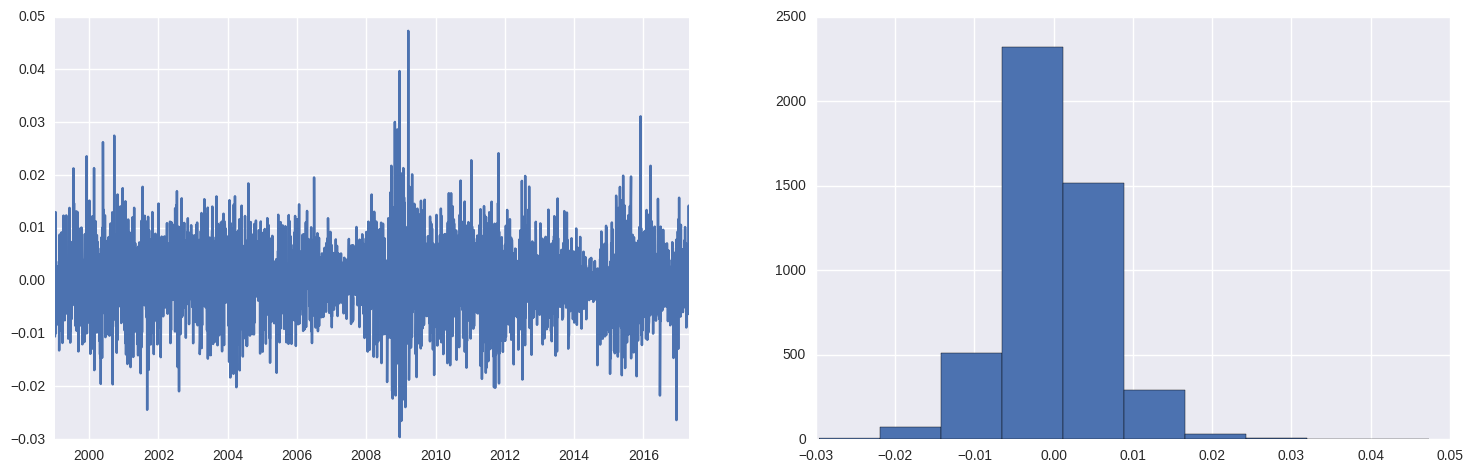

In [43]:
# Plot of spot exchange variations for EURUSD
%matplotlib inline
plt.figure(figsize=(18,12), dpi=80, edgecolor='w', facecolor='w')
plt.subplot(221)
plt.plot(df_eurusd.index,df_eurusd['eurusd_prevDayChange'])
plt.subplot(222)
plt.hist(df_eurusd.ix[1:,'eurusd_prevDayChange'])

In [44]:
# check for eventual NaNs in a column
df_eurusd.index[df_eurusd.eurusd_prevDayChange.isnull()]

DatetimeIndex(['1999-01-05'], dtype='datetime64[ns]', freq=None)

In [45]:
# example of the eurusd df
df_eurusd[int(len(df_eurusd)/2):int(len(df_eurusd)/2 + 5)]

,eurusd,libor 1m eur,libor 1m usd,libor 3m eur,libor 3m usd,libor 1w eur,libor 1w usd,fw_eurusd,cip_dev_eurusd,r_usd,r_eur,delta_cip_dev_eurusd,eurusd_prevDayChange,eurusd_nextDayChange
2008-02-26,1.4889,4.18563,3.12500,4.38563,3.09000,4.12750,3.14125,1.4911,-0.005303,0.009214,0.013019,-0.005373,0.004520,0.016321
2008-02-27,1.5132,4.18813,3.12188,4.39063,3.08500,4.12688,3.14250,1.5061,0.000953,0.009115,0.012915,0.006255,0.016321,0.002643
2008-02-28,1.5172,4.20125,3.11938,4.38813,3.07563,4.11250,3.14250,1.5156,-0.002717,0.009004,0.012788,-0.003669,0.002643,0.001516
2008-03-03,1.5195,4.20000,3.08625,4.38250,3.01438,4.10688,3.13625,1.5133,0.000332,0.008498,0.012296,0.003049,0.001516,0.000987
2008-03-04,1.5210,4.20125,3.08000,4.38875,3.00813,4.11000,3.13438,1.5146,0.000463,0.008399,0.012194,0.000131,0.000987,0.004734


In [46]:
# Save into csv
df_eurusd.to_csv('/home/gio/findata/df_eurusd')
df_gbpusd.to_csv('/home/gio/findata/df_gbpusd')
df_usdjpy.to_csv('/home/gio/findata/df_usdjpy')

__**Need to save time? Load data from the previously saved csv's**__

In [2]:
df_eurusd = pd.read_csv('/home/gio/findata/df_eurusd', index_col=0, parse_dates=True)
df_gbpusd = pd.read_csv('/home/gio/findata/df_gbpusd', index_col=0, parse_dates=True)
df_usdjpy = pd.read_csv('/home/gio/findata/df_usdjpy', index_col=0, parse_dates=True)

# 3. Plots

For a random slice of dates in the index I plot returns for investments in gbp and usd, alongside the correlated deviation from CIP. We will see that CIP deviations are strongly dependent from the difference between interest rates and incorporates external factors feasible to distort my analysis. This is why later I'll plot the firs difference instead.

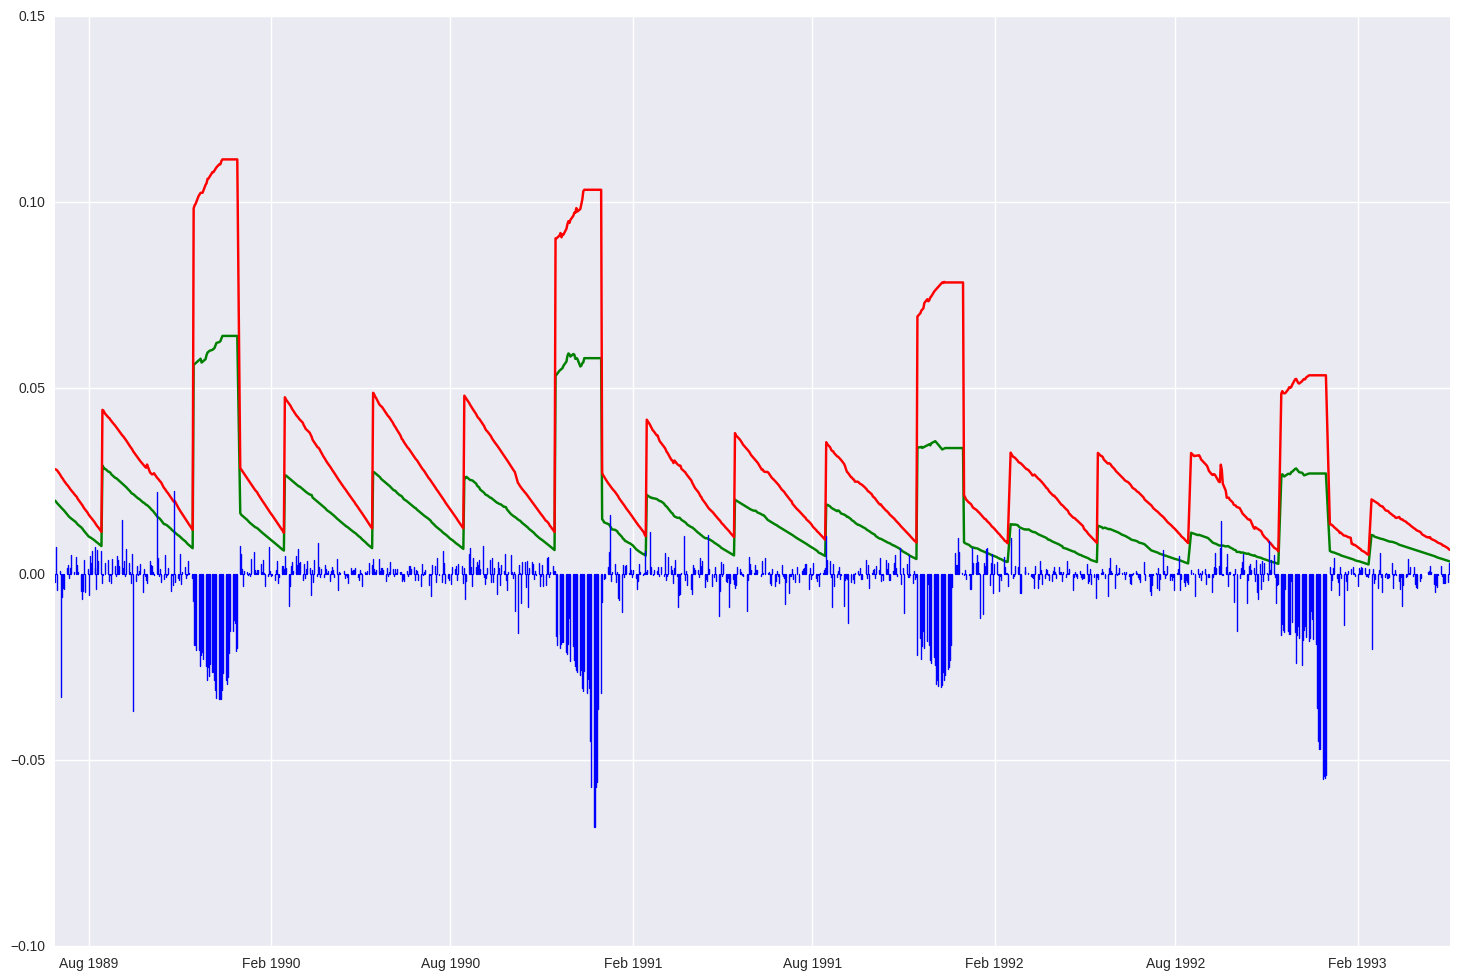

In [48]:
fig=plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df_gbpusd.index[900:1900], df_gbpusd['r_usd'][900:1900], 'green')
plt.plot(df_gbpusd.index[900:1900], df_gbpusd['r_gbp'][900:1900], 'red')
for j in df_gbpusd.index[900:1900]:
    plt.plot([j,j], 
             [0, df_gbpusd.loc[str(j)[0:10], 'cip_dev_gbpusd']],
             '-b', linewidth=1 , label='CIP_deviation' if j == df_gbpusd.index[901] else "")

Large oscillations. Deviations are affected by additional noisy factors as the risk premium for investing in different currencies. Taking first difference and plotting them instead of CIP deviations yields a better visualization...

## Plot first differencies of daily cip deviations alongside r1 and r2

Here I define a function to plot them for each currency pair:

In [49]:
def plot_cip_dev(pair, df):
    "plot the two currencies' returns + daily CIP devs. Pair must be a valid string for a currency pair, ex: 'gbpusd'"
    cur1=pair[3:6]
    cur2=pair[0:3]
    %matplotlib inline
    fig=plt.figure(figsize=(18, 70), dpi= 80, facecolor='w', edgecolor='k')
    for i in np.arange(1,9):
        plt.subplot(810+i)
        plt.plot(df.index[(i*1000-1000):(i*1000)], df['r_'+cur1][(i*1000-1000):(i*1000)], 'green')
        plt.plot(df.index[(i*1000-1000):(i*1000)], df['r_'+cur2][(i*1000-1000):(i*1000)], 'red')
        for j in df.index[(i*1000-1000):(i*1000)]:
            plt.plot([j,j], 
                     [0, df.loc[str(j)[0:10], 'delta_cip_dev_'+pair]],
                     '-b', linewidth=1 , label='delta_CIP_deviation' if j == df.index[i*1000-1] else "")
        plt.legend()

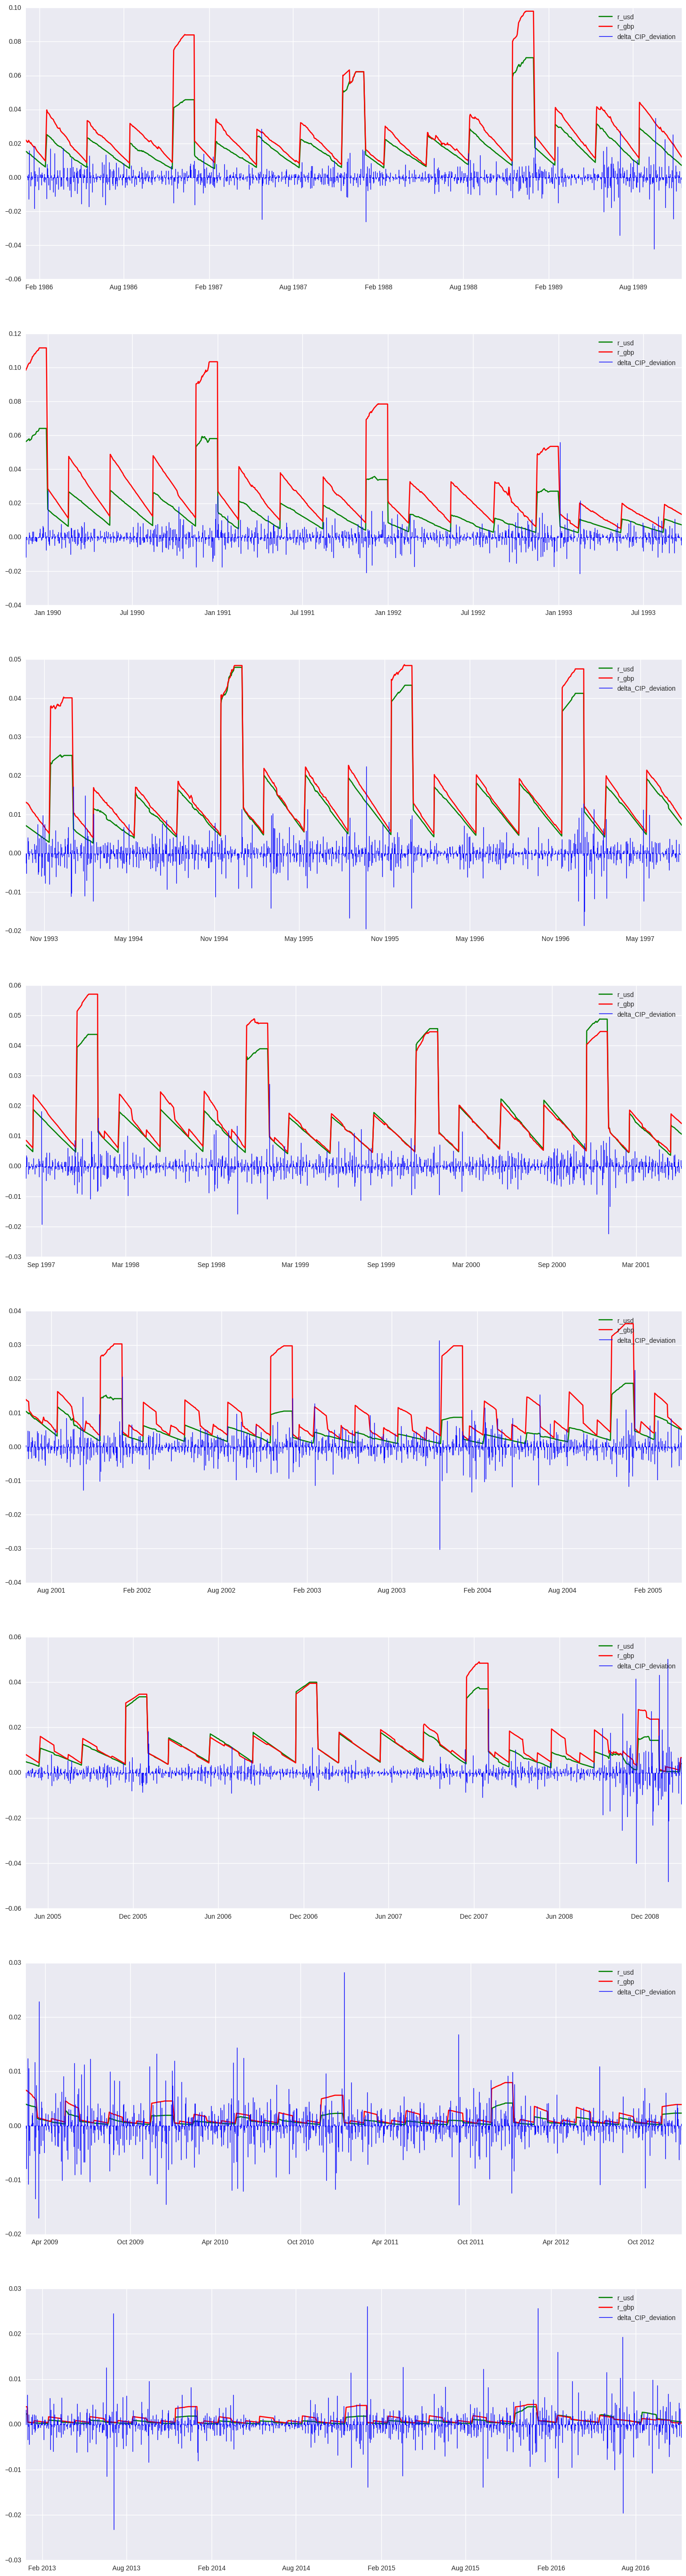

In [50]:
# GBPUSD
plot_cip_dev('gbpusd', df_gbpusd)

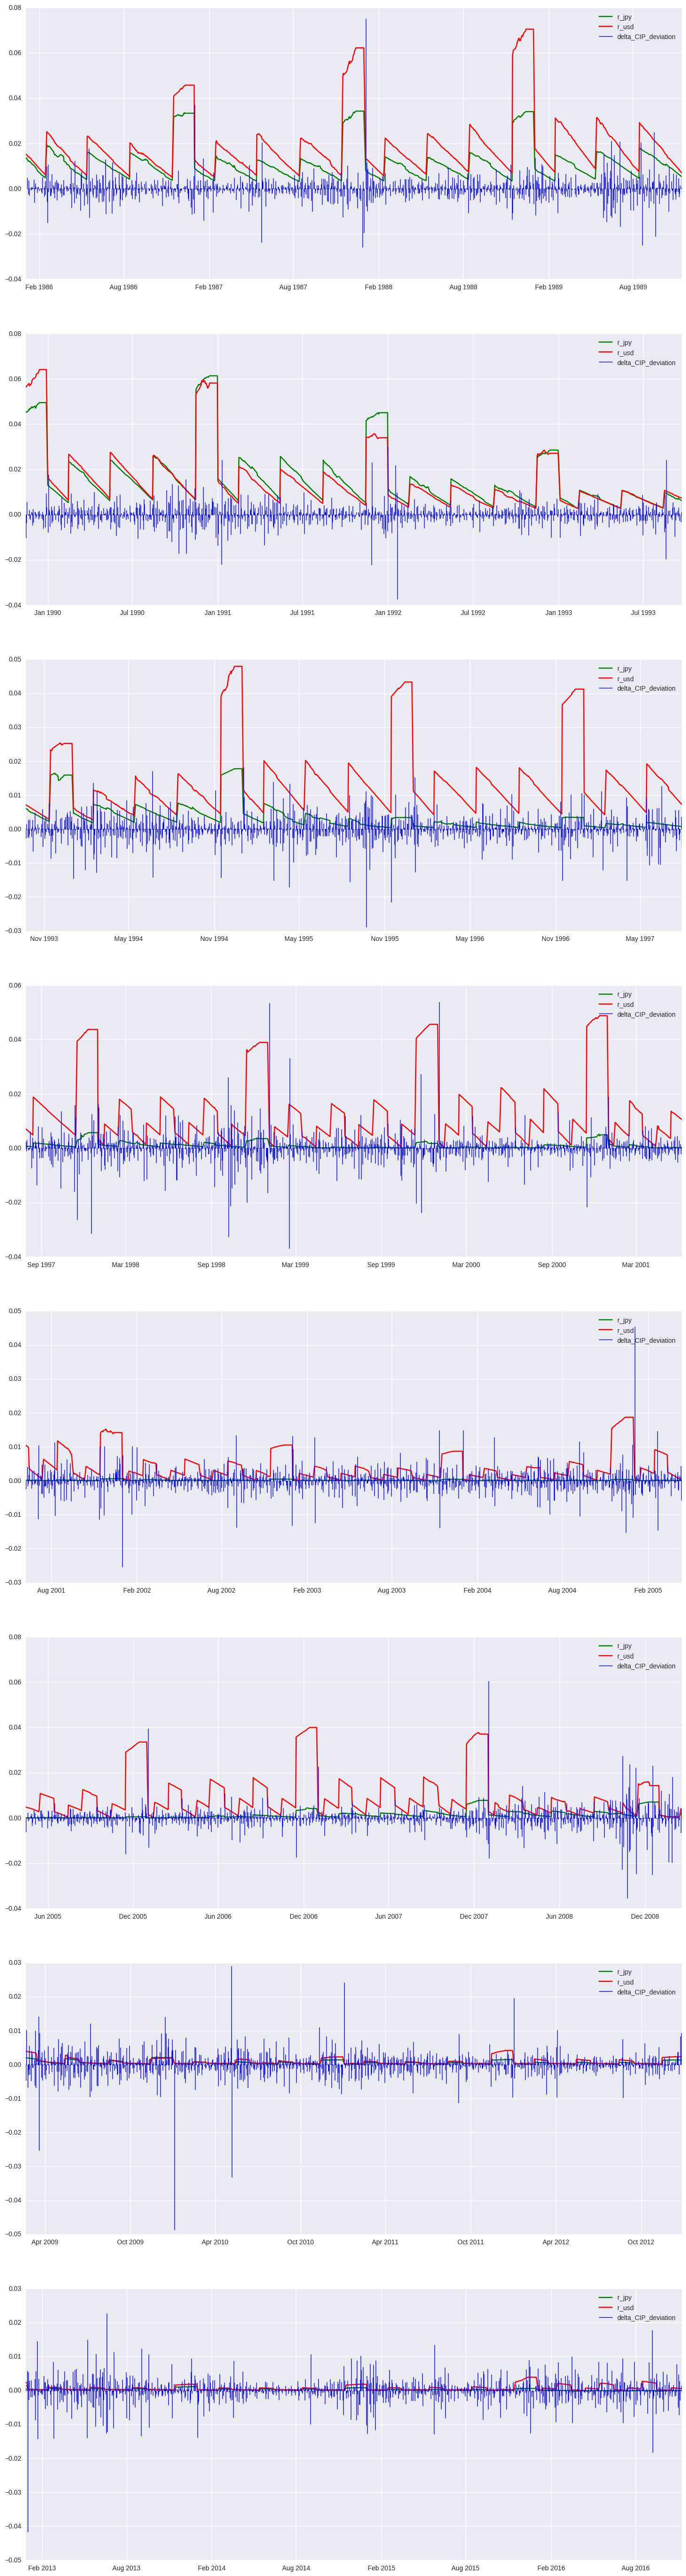

In [51]:
# USDJPY
plot_cip_dev('usdjpy', df_usdjpy)

#### Che commento qua?



***

***

# 4. Arbitrage

Referring to the way I have previously calculated deviations from covered interest parity:

$ CIP deviation = 1 + r_{1} - (1 + r_{2})*\frac{F_{2/1}}{E_{2/1}}$

The advantage of using LIBOR rates as benchmark is that, once I assume to be an idealistic investment bank in London, I would be able to lend and borrow currencies at those rate and I will try to make arbitrage profits.

**When the deviation from CIP is negative**, economic agents will prefer deposits in currency2 to deposits in currency1. 

--> According to that, every owner of currency1 will try to sell it for currency2: the result should be a depreciation of currency1 (i.e., an appreciation of the cherished currency2)

--> $E_{2/1}$ and $F_{2/1}$ values increase.

--> I could go short on currency1 and make a profit as currency2 appreciates.

On the other hand, **when the deviation from CIP is positive**, economic agents in London will prefer deposits in currency1 to deposits in currency2, hence I could buy currency1 and sell it to make a profit as soon as it appreciates.


Now my aim will be to verify if these theoretical assumptions hold accountable after a deviation is observed, and explore profitable opportunities.

What I want to test using my code, is the following: 

+ verify that CIP deviations are really counter-weighted by appreciations/depreciations of currencies

+ suggest the best timing for exiting the long/short operation

## A glance at spot exchange reaction to CIP deviatios

Let's try to select a random interval among the observations where the deviation from CIP for the pair GBPUSD was positive.

I plot the value of the spot exchange at the deviation date and after respectively, 3, 30 and 60 days. What I'd expect is to see the spot rate increase after the deviation (this means a depreciation of GBP, which is currency2 according to the formula).

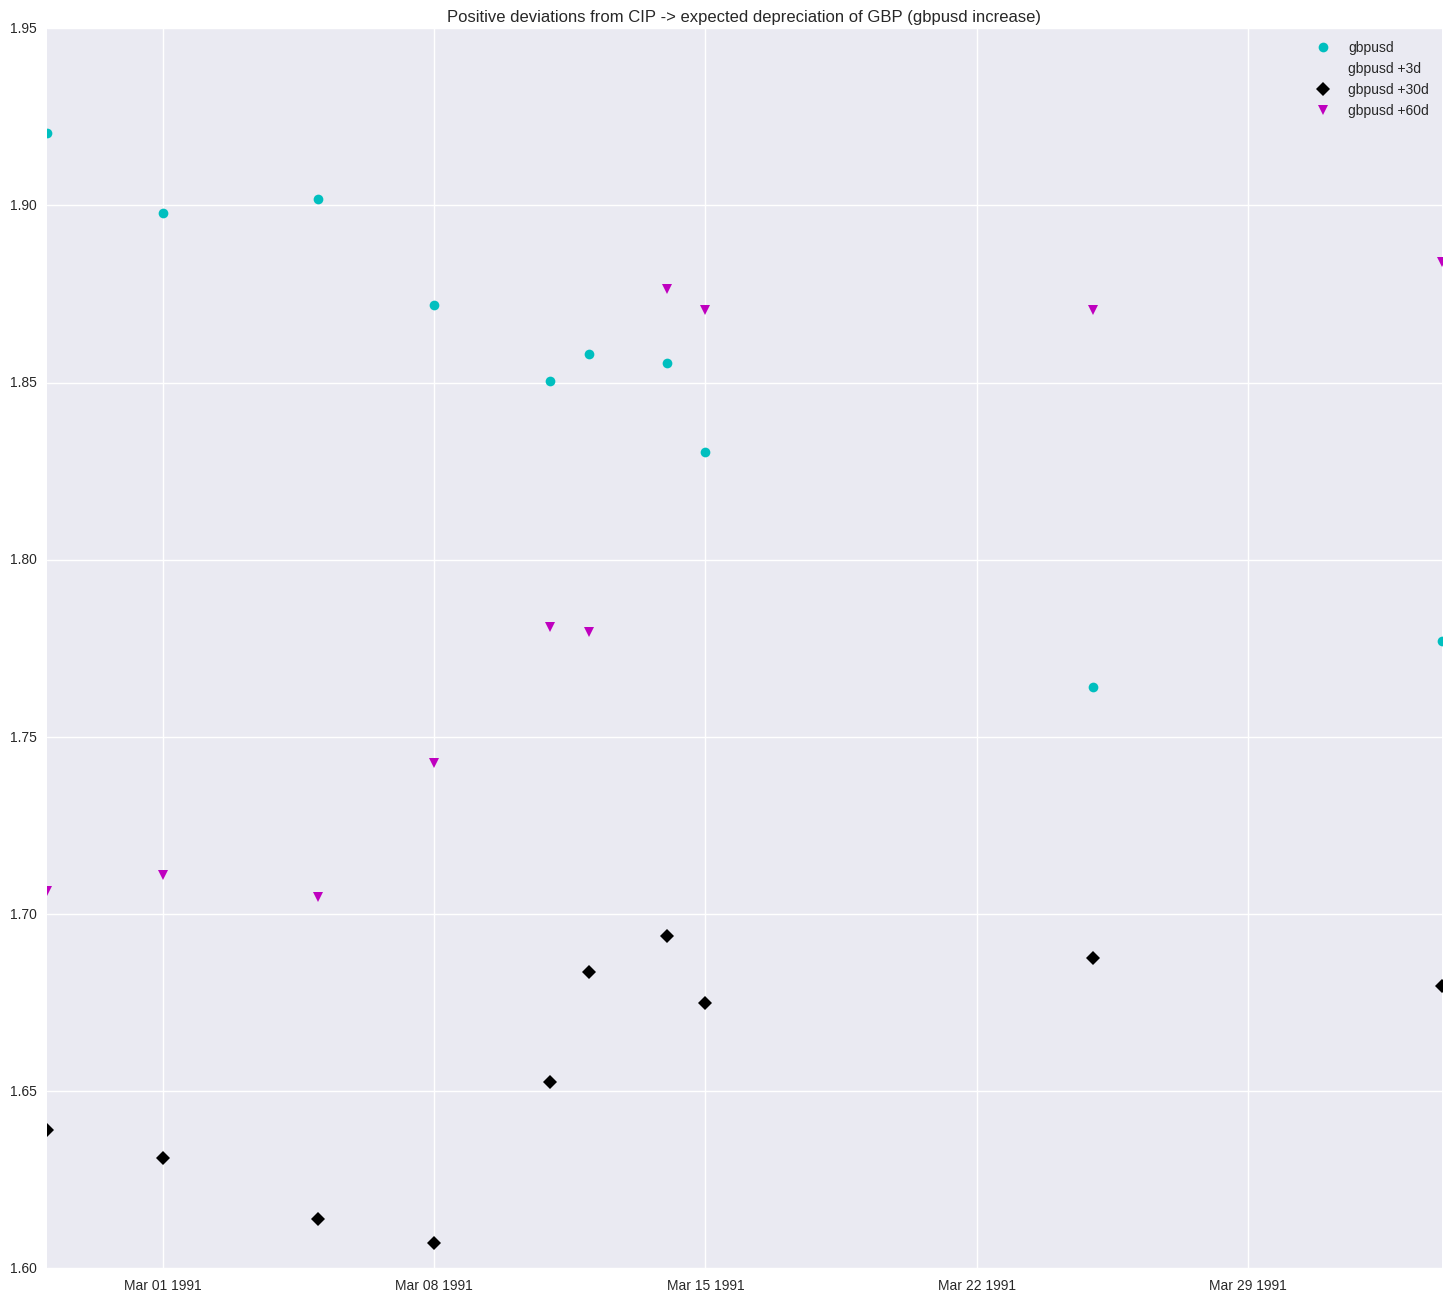

In [52]:
subset = df_gbpusd[df_gbpusd['cip_dev_gbpusd']>0.001]
%matplotlib inline
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for i in range(420,430):
    plt.plot(subset.index[i], subset.loc[str(subset.index[i])[0:10], 'gbpusd'], 'oc', label='gbpusd' if i == 420 else "")
    plt.plot(subset.index[i], subset.loc[str(subset.index[i+3])[0:10], 'gbpusd'], 'xr', label='gbpusd +3d' if i == 420 else "")
    plt.plot(subset.index[i], subset.loc[str(subset.index[i+30])[0:10], 'gbpusd'], 'Dk', label='gbpusd +30d' if i == 420 else "")
    plt.plot(subset.index[i], subset.loc[str(subset.index[i+60])[0:10], 'gbpusd'], 'vm', label='gbpusd +60d' if i == 420 else "")
plt.title('Positive deviations from CIP -> expected depreciation of GBP (gbpusd increase)')
plt.legend()

The results could reassure dead economists: in most of the observations the spot after 3 days is below the one at the deviation date, but the spot after 30 days is often above while after 60days has always risen

***
I proceed with a deeper exploration into this mechanisms: below I define a function to plot **future reactions** of the spot exchange rates to **positive/negative** cip_deviations

In [53]:
def spot_reactions(pair, deviation, df):
    "pair must be a string representing a valid currency pair, like 'gbpusd'"
    "deviation indicates the threshold for the subset of df:"
    "when a positive number is given the subset is df[df['cip_dev_'+pair]>deviation]"
    "when a negative number is given the subset is df[df['cip_dev_'+pair]<deviation]"
    #global sub_df
    if deviation>0:
        sub_df = df[df['cip_dev_'+pair]>deviation]
        tag = 'Positive'
        movement = ' appreciation '
        pair_behave = ' decreases'
    if deviation<0:
        sub_df = df[df['cip_dev_'+pair]<deviation]
        tag = 'Negative'
        movement = ' depreciation '
        pair_behave = ' increases'
    print 'the number of observations which satisfy the given condition on deviation is %s' %(len(sub_df))
    if len(sub_df)>1000:
        n_subplots = int(len(sub_df)/1000)
        %matplotlib inline
        fig = plt.figure(figsize=(18, n_subplots*10), dpi= 80, facecolor='w', edgecolor='k')
        for j in np.arange(1,n_subplots+1):
            plt.subplot(n_subplots*100 + 10 + j)
            for i in range(j*1000-1000,j*1000-60):
                plt.plot([sub_df.index[i],sub_df.index[i]],
                         [0.5, sub_df.loc[str(sub_df.index[i+60])[0:10], pair]], 
                         '-m', linewidth=3, label=pair+' after 60d' if i == 0 else "")
                plt.plot([sub_df.index[i],sub_df.index[i]], 
                         [0.5, sub_df.loc[str(sub_df.index[i+30])[0:10], pair]], 
                         '-k', linewidth=3, label=pair+' after 30d' if i == 0 else "")
                plt.plot([sub_df.index[i],sub_df.index[i]],
                         [0.5,sub_df.loc[str(sub_df.index[i])[0:10], pair]],
                         '-c', linewidth=3, label=pair +' time of deviation' if i == 0 else "")
            plt.title(tag+' deviations from CIP -> expected '+ movement +' of '+pair[3:6]+' ('+pair+ pair_behave+')')
            plt.legend()
    else:
        %matplotlib inline
        fig = plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
        for i in range(len(sub_df)-60):
            plt.plot([sub_df.index[i],sub_df.index[i]], 
                     [0.5, sub_df.loc[str(sub_df.index[i+60])[0:10], pair]],
                     '-m', linewidth=3, label=pair+' after 60d' if i == 0 else "")
            plt.plot([sub_df.index[i],sub_df.index[i]], 
                     [0.5, sub_df.loc[str(sub_df.index[i+30])[0:10], pair]],
                     '-k', linewidth=3, label=pair+' after 30d' if i == 0 else "")
            plt.plot([sub_df.index[i],sub_df.index[i]],
                     [0.5, sub_df.loc[str(sub_df.index[i])[0:10], pair]],
                     '-c', linewidth=3, label=pair+'time of deviation' if i == 0 else "")
        plt.title(tag+' deviations from CIP -> expected'+ movement +'of '+pair[3:6]+' ('+pair+ pair_behave+')')
        plt.legend()


the number of observations which satisfy the given condition on deviation is 4261


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


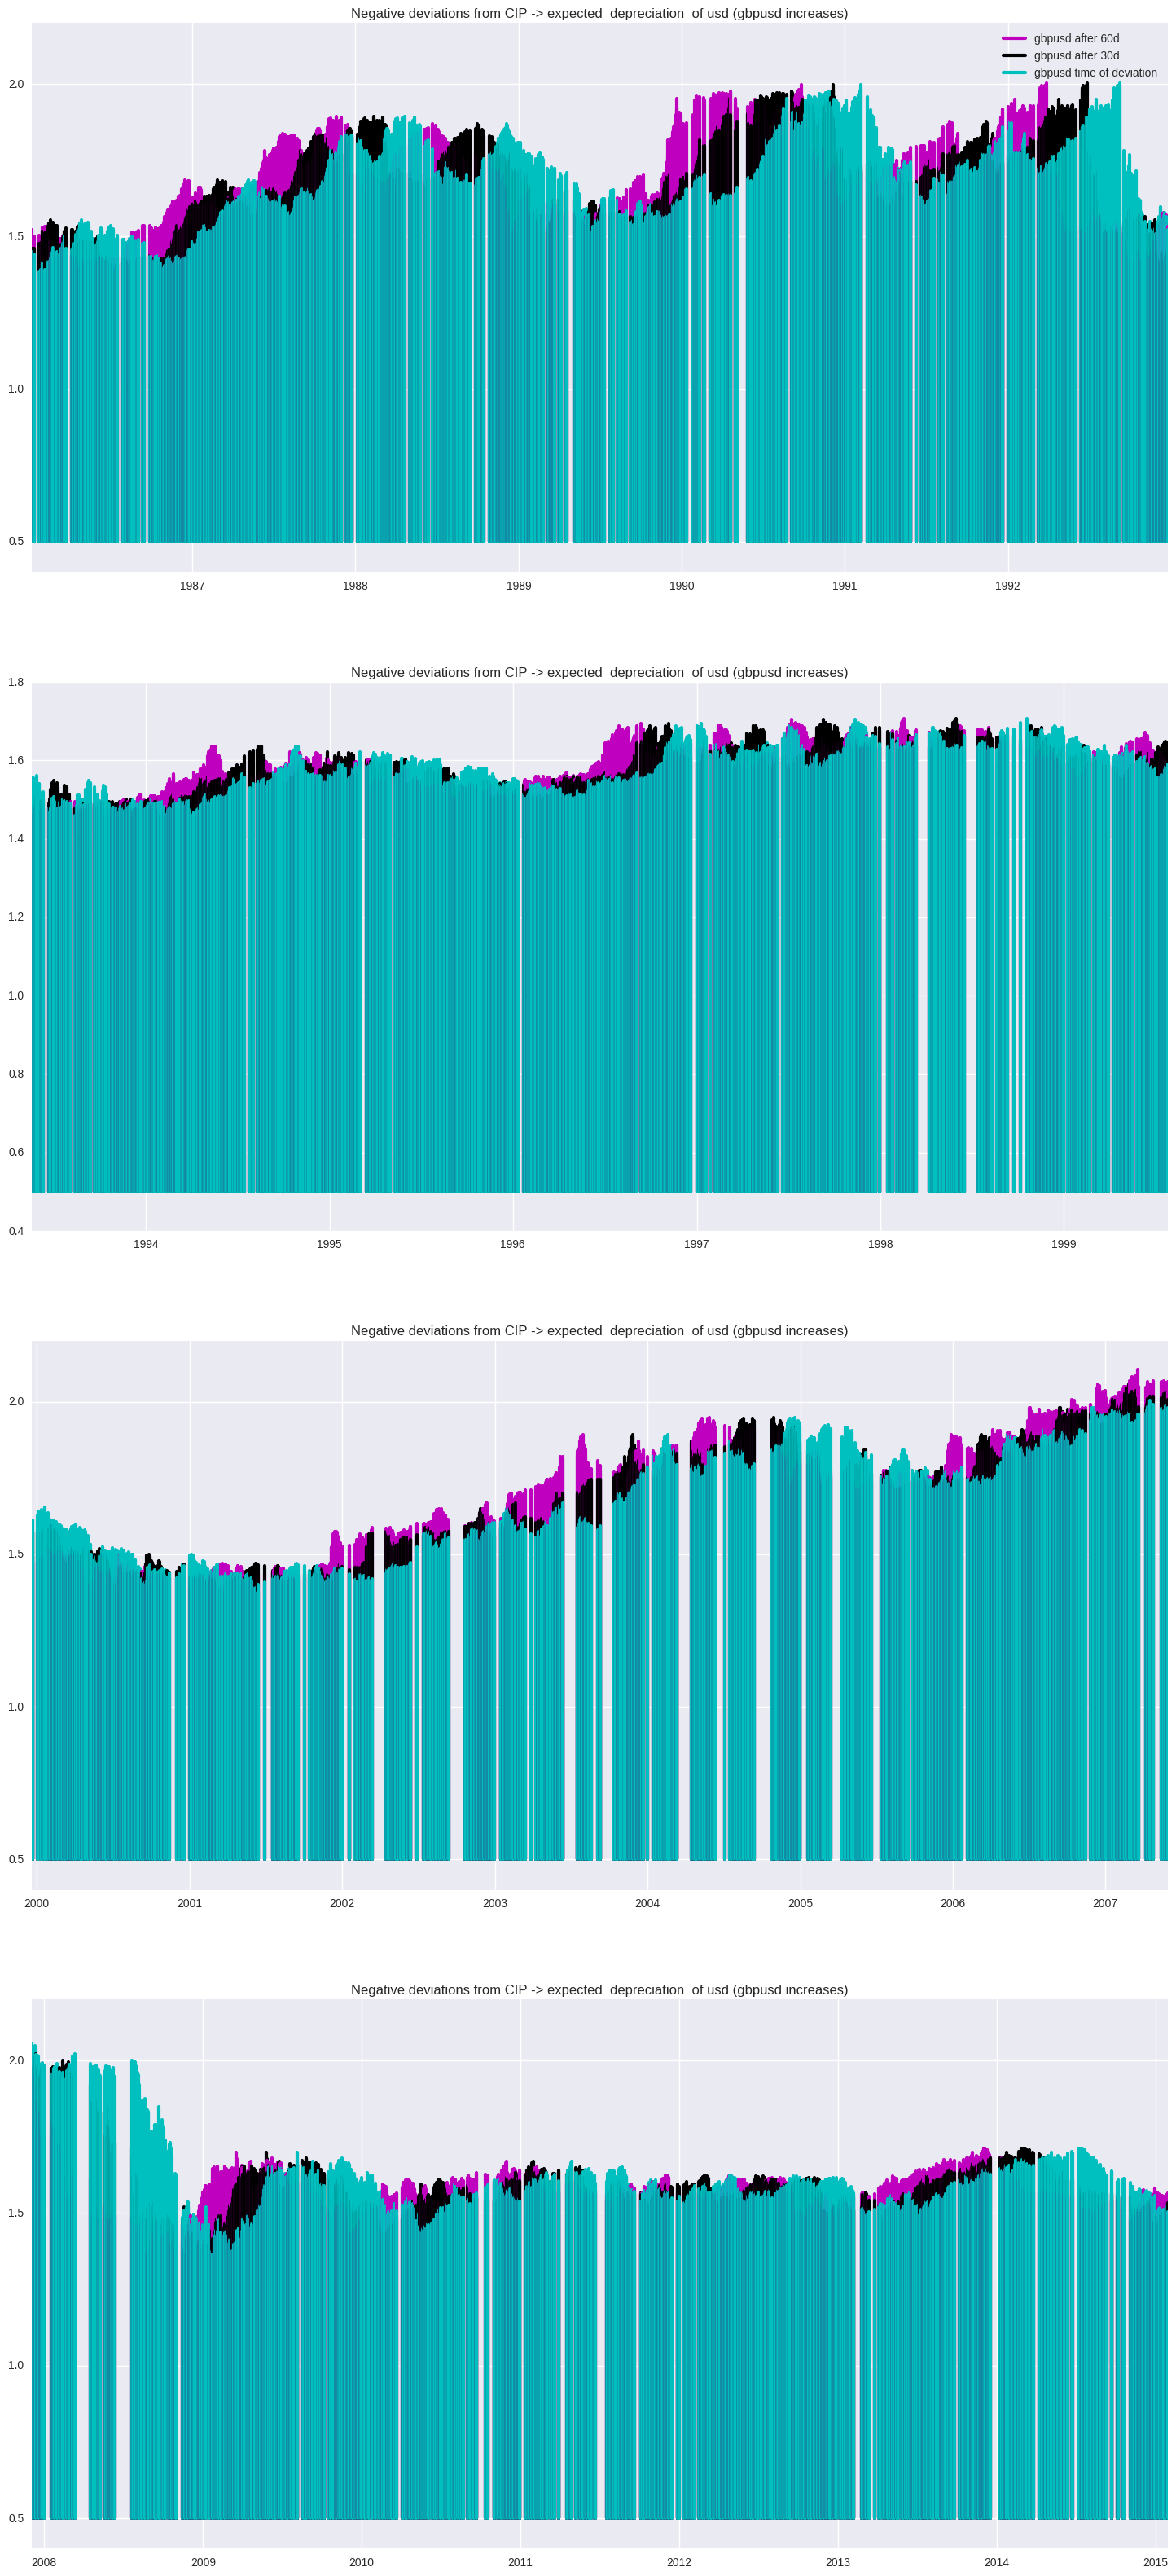

In [58]:
spot_reactions('gbpusd', -0.0001, df_gbpusd)

the number of observations which satisfy the given condition on deviation is 3480


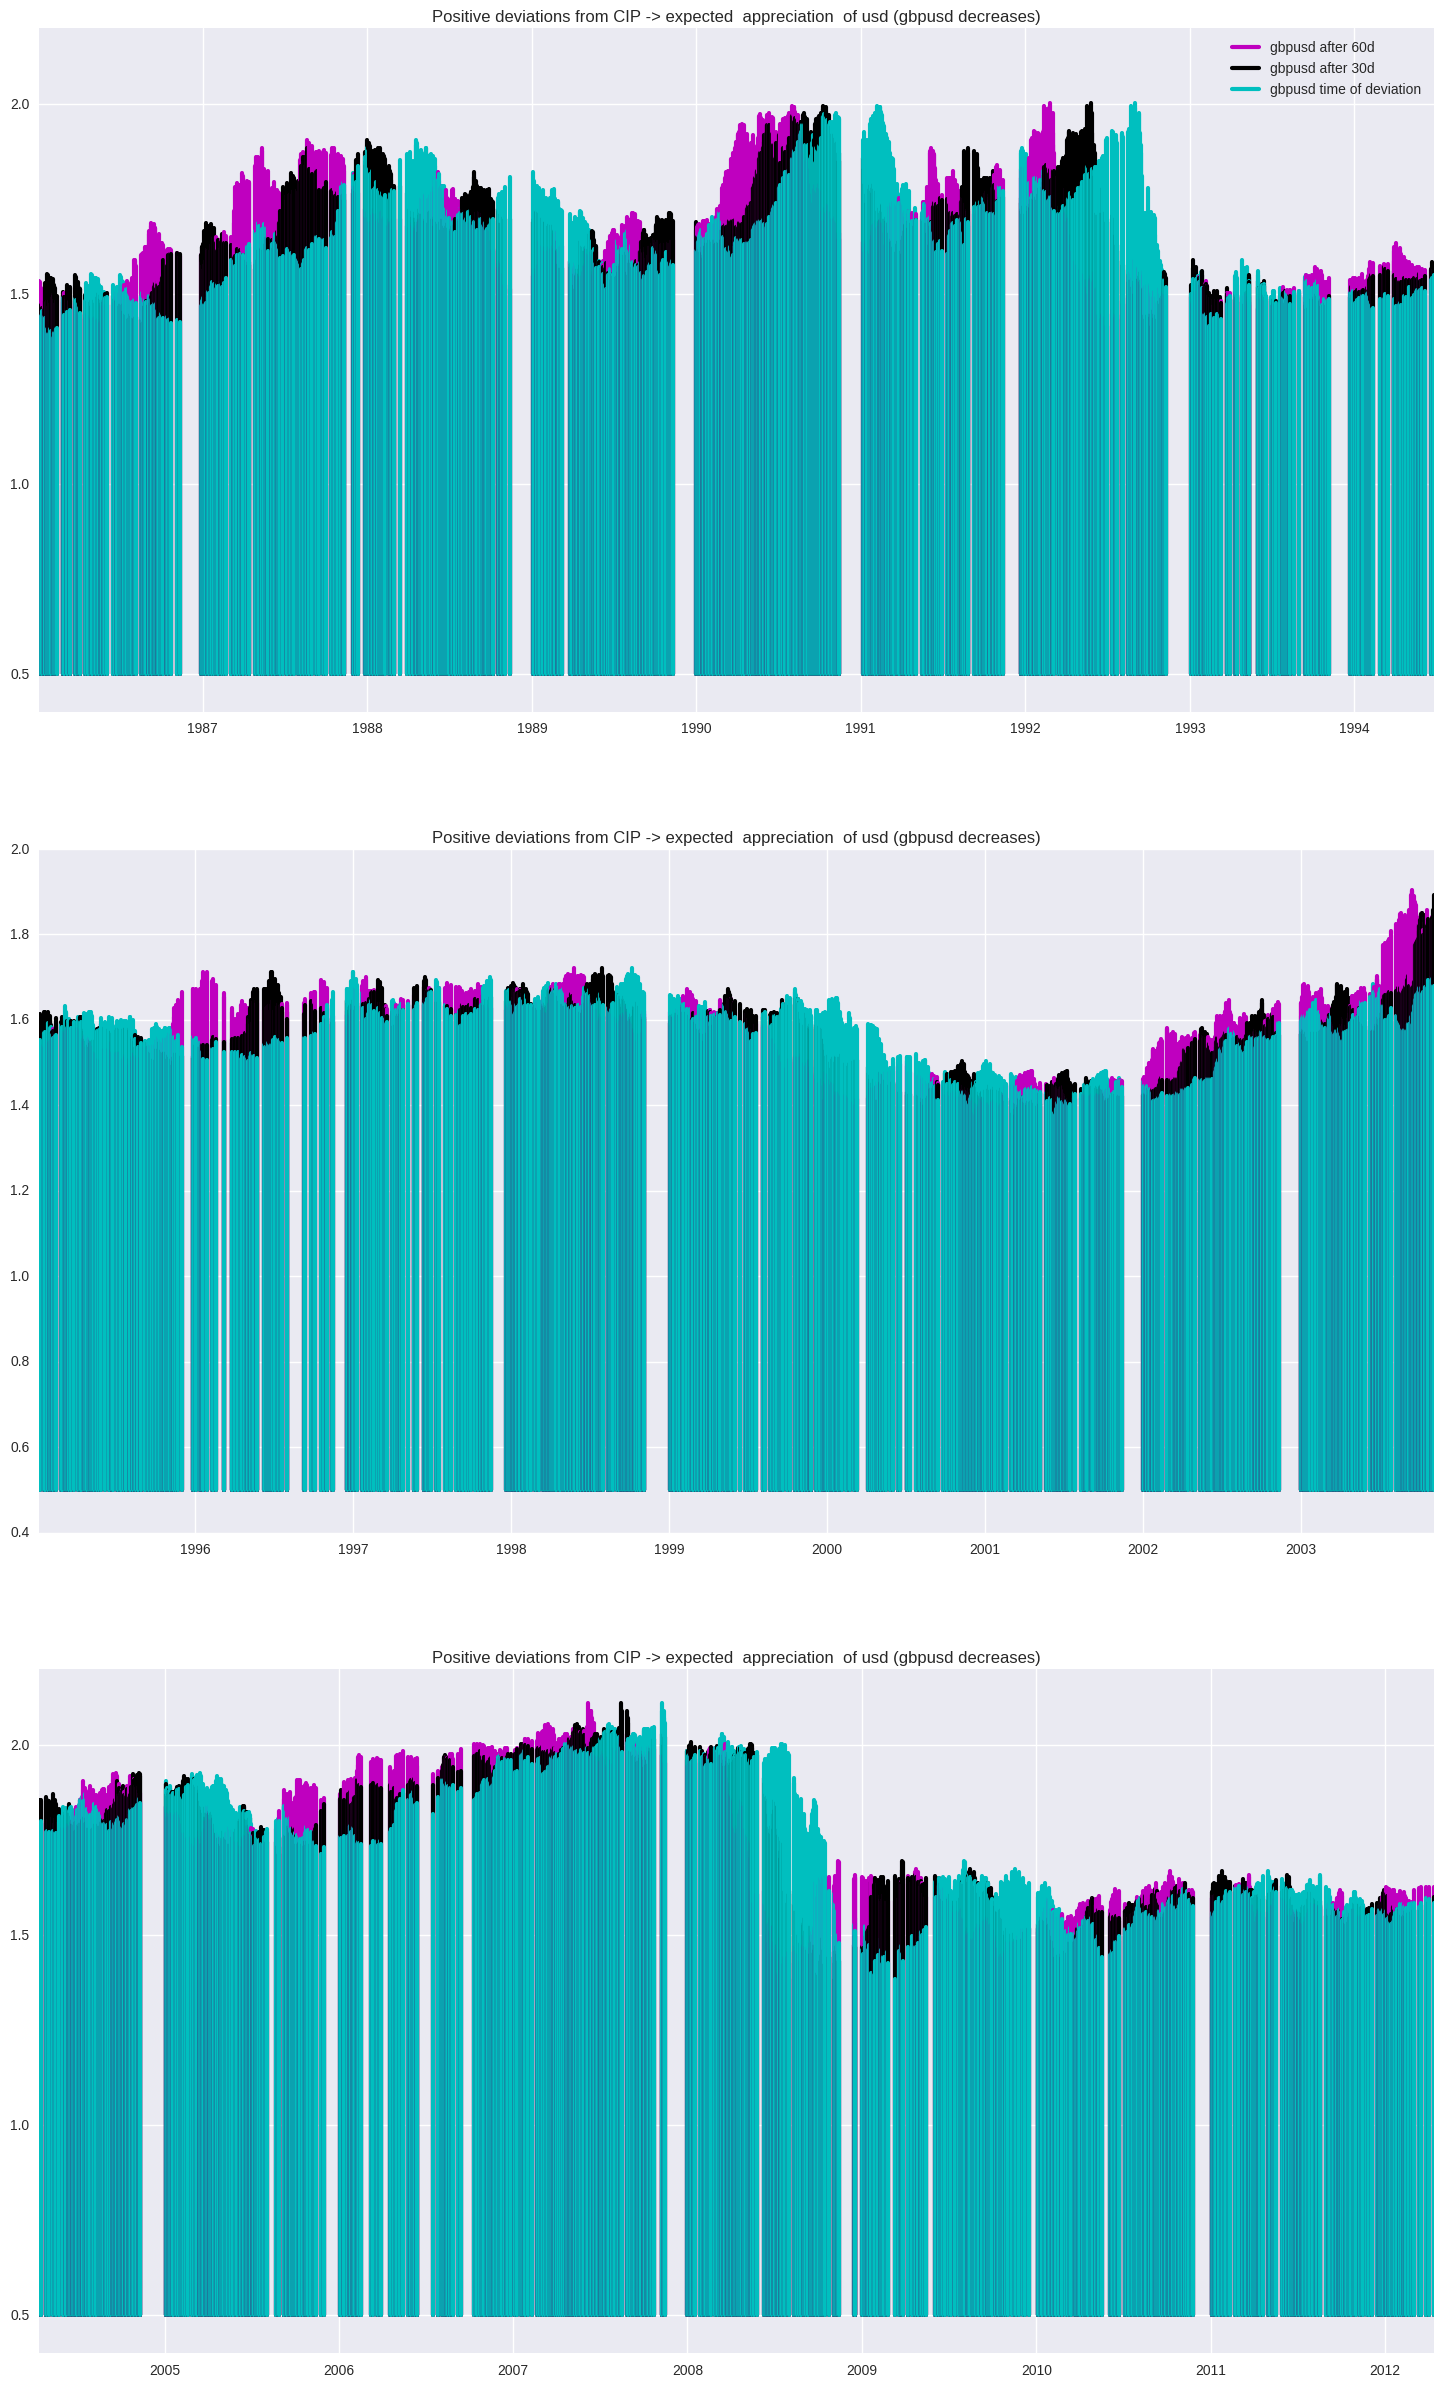

In [59]:
spot_reactions('gbpusd',0.0001, df_gbpusd)

the number of observations which satisfy the given condition on deviation is 4741


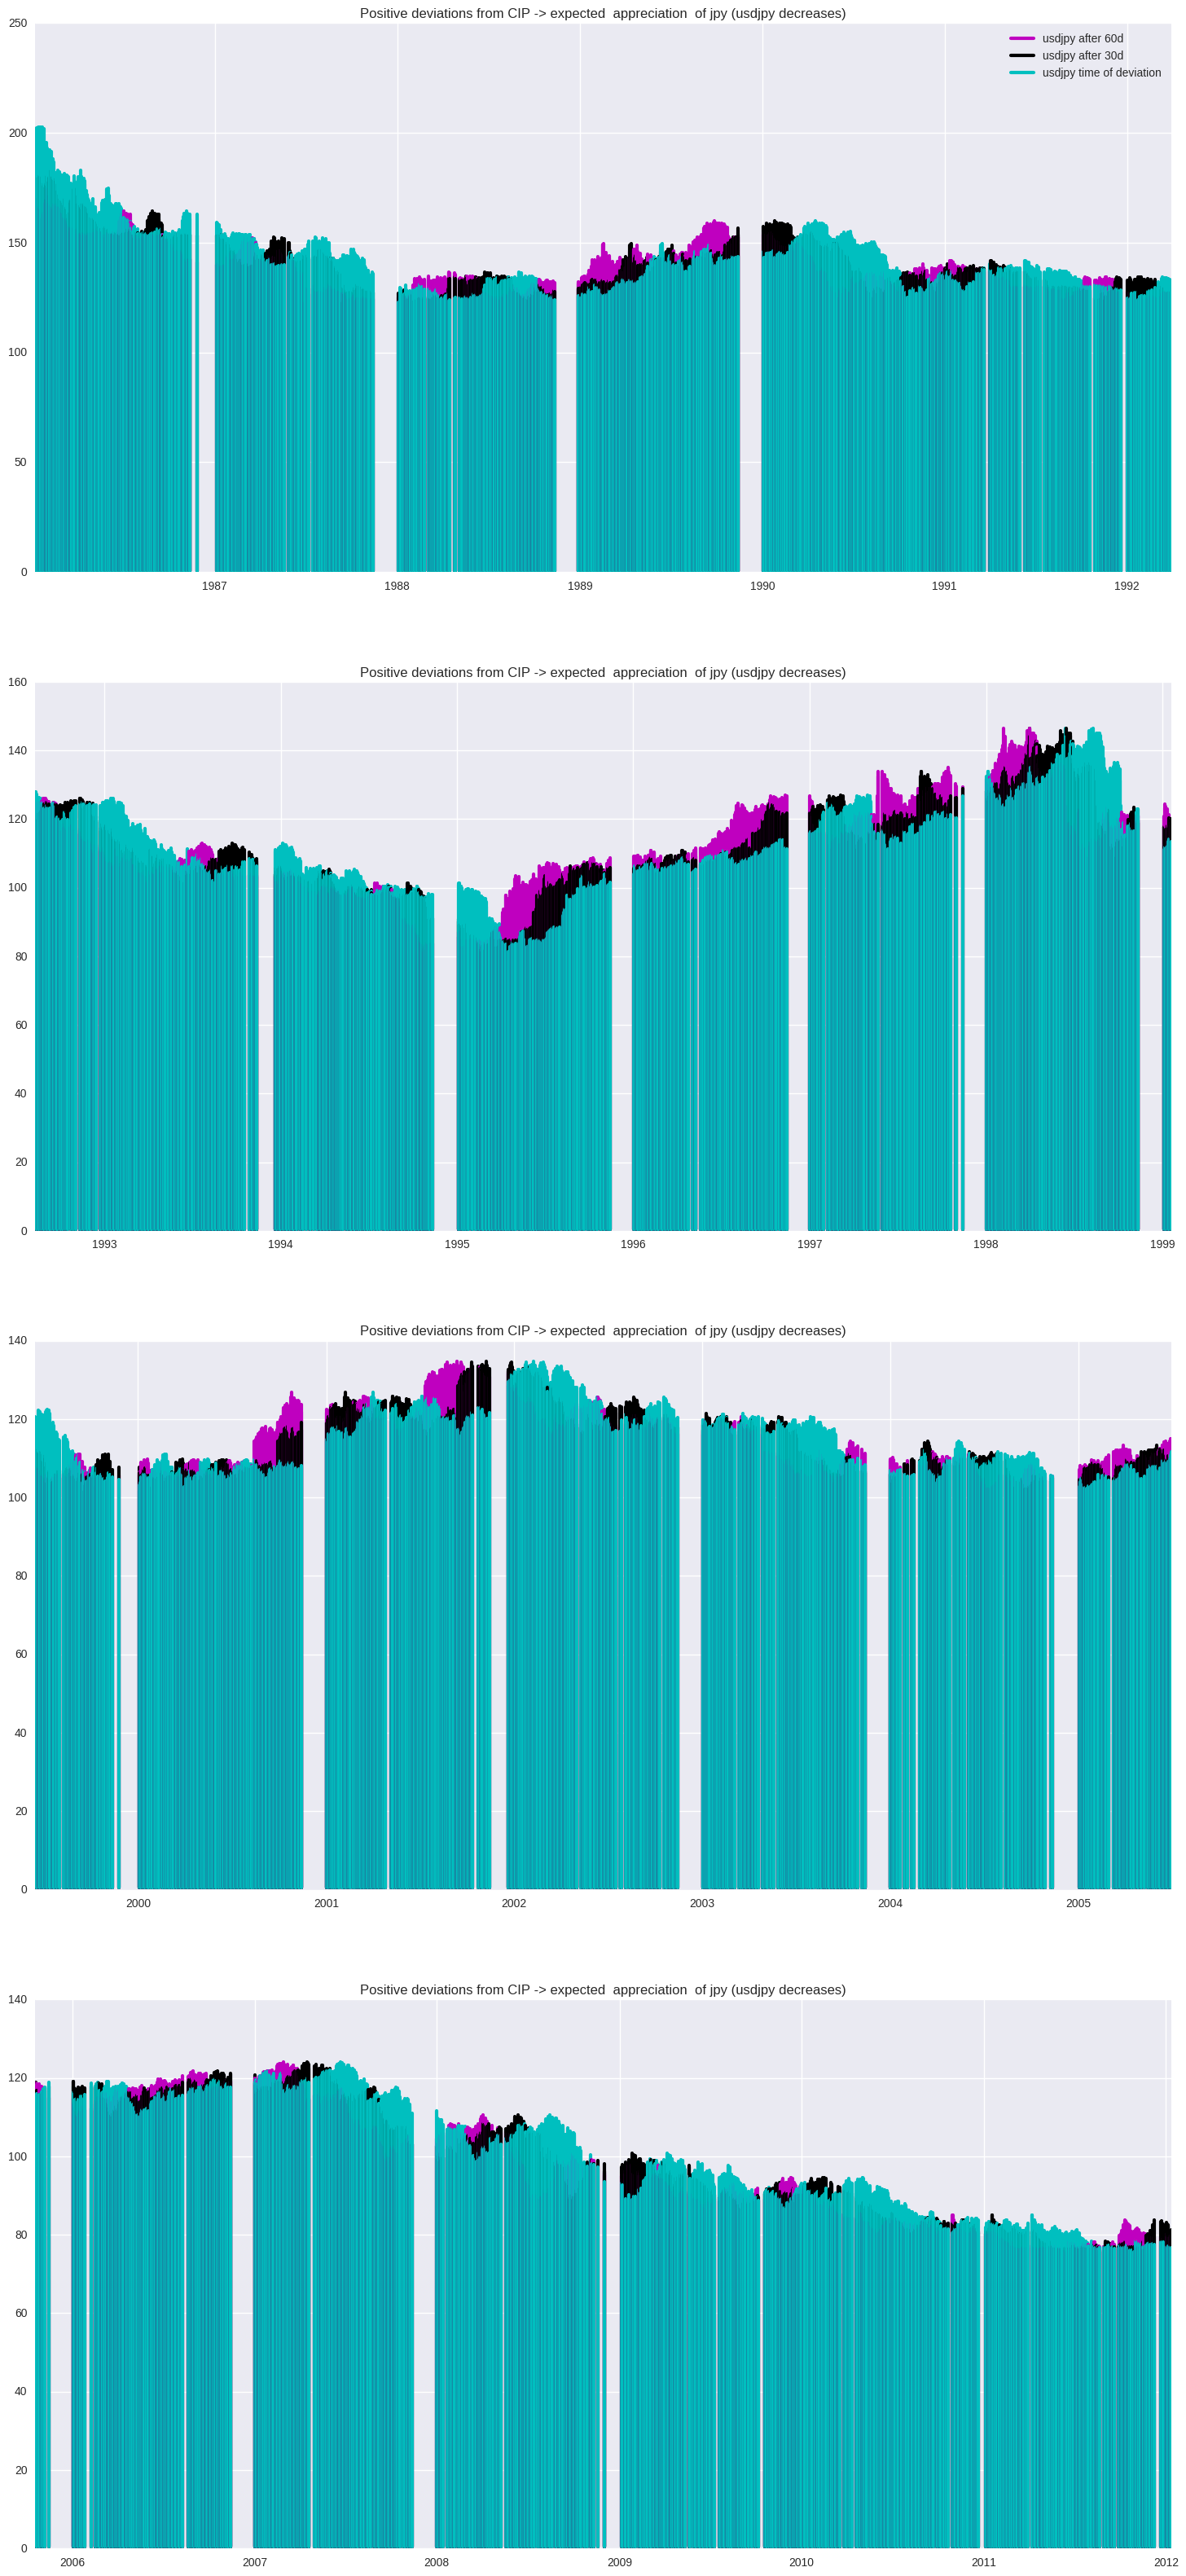

In [60]:
# And for USDJPY ?
spot_reactions('usdjpy', 0.0001, df_usdjpy)

the number of observations which satisfy the given condition on deviation is 3081


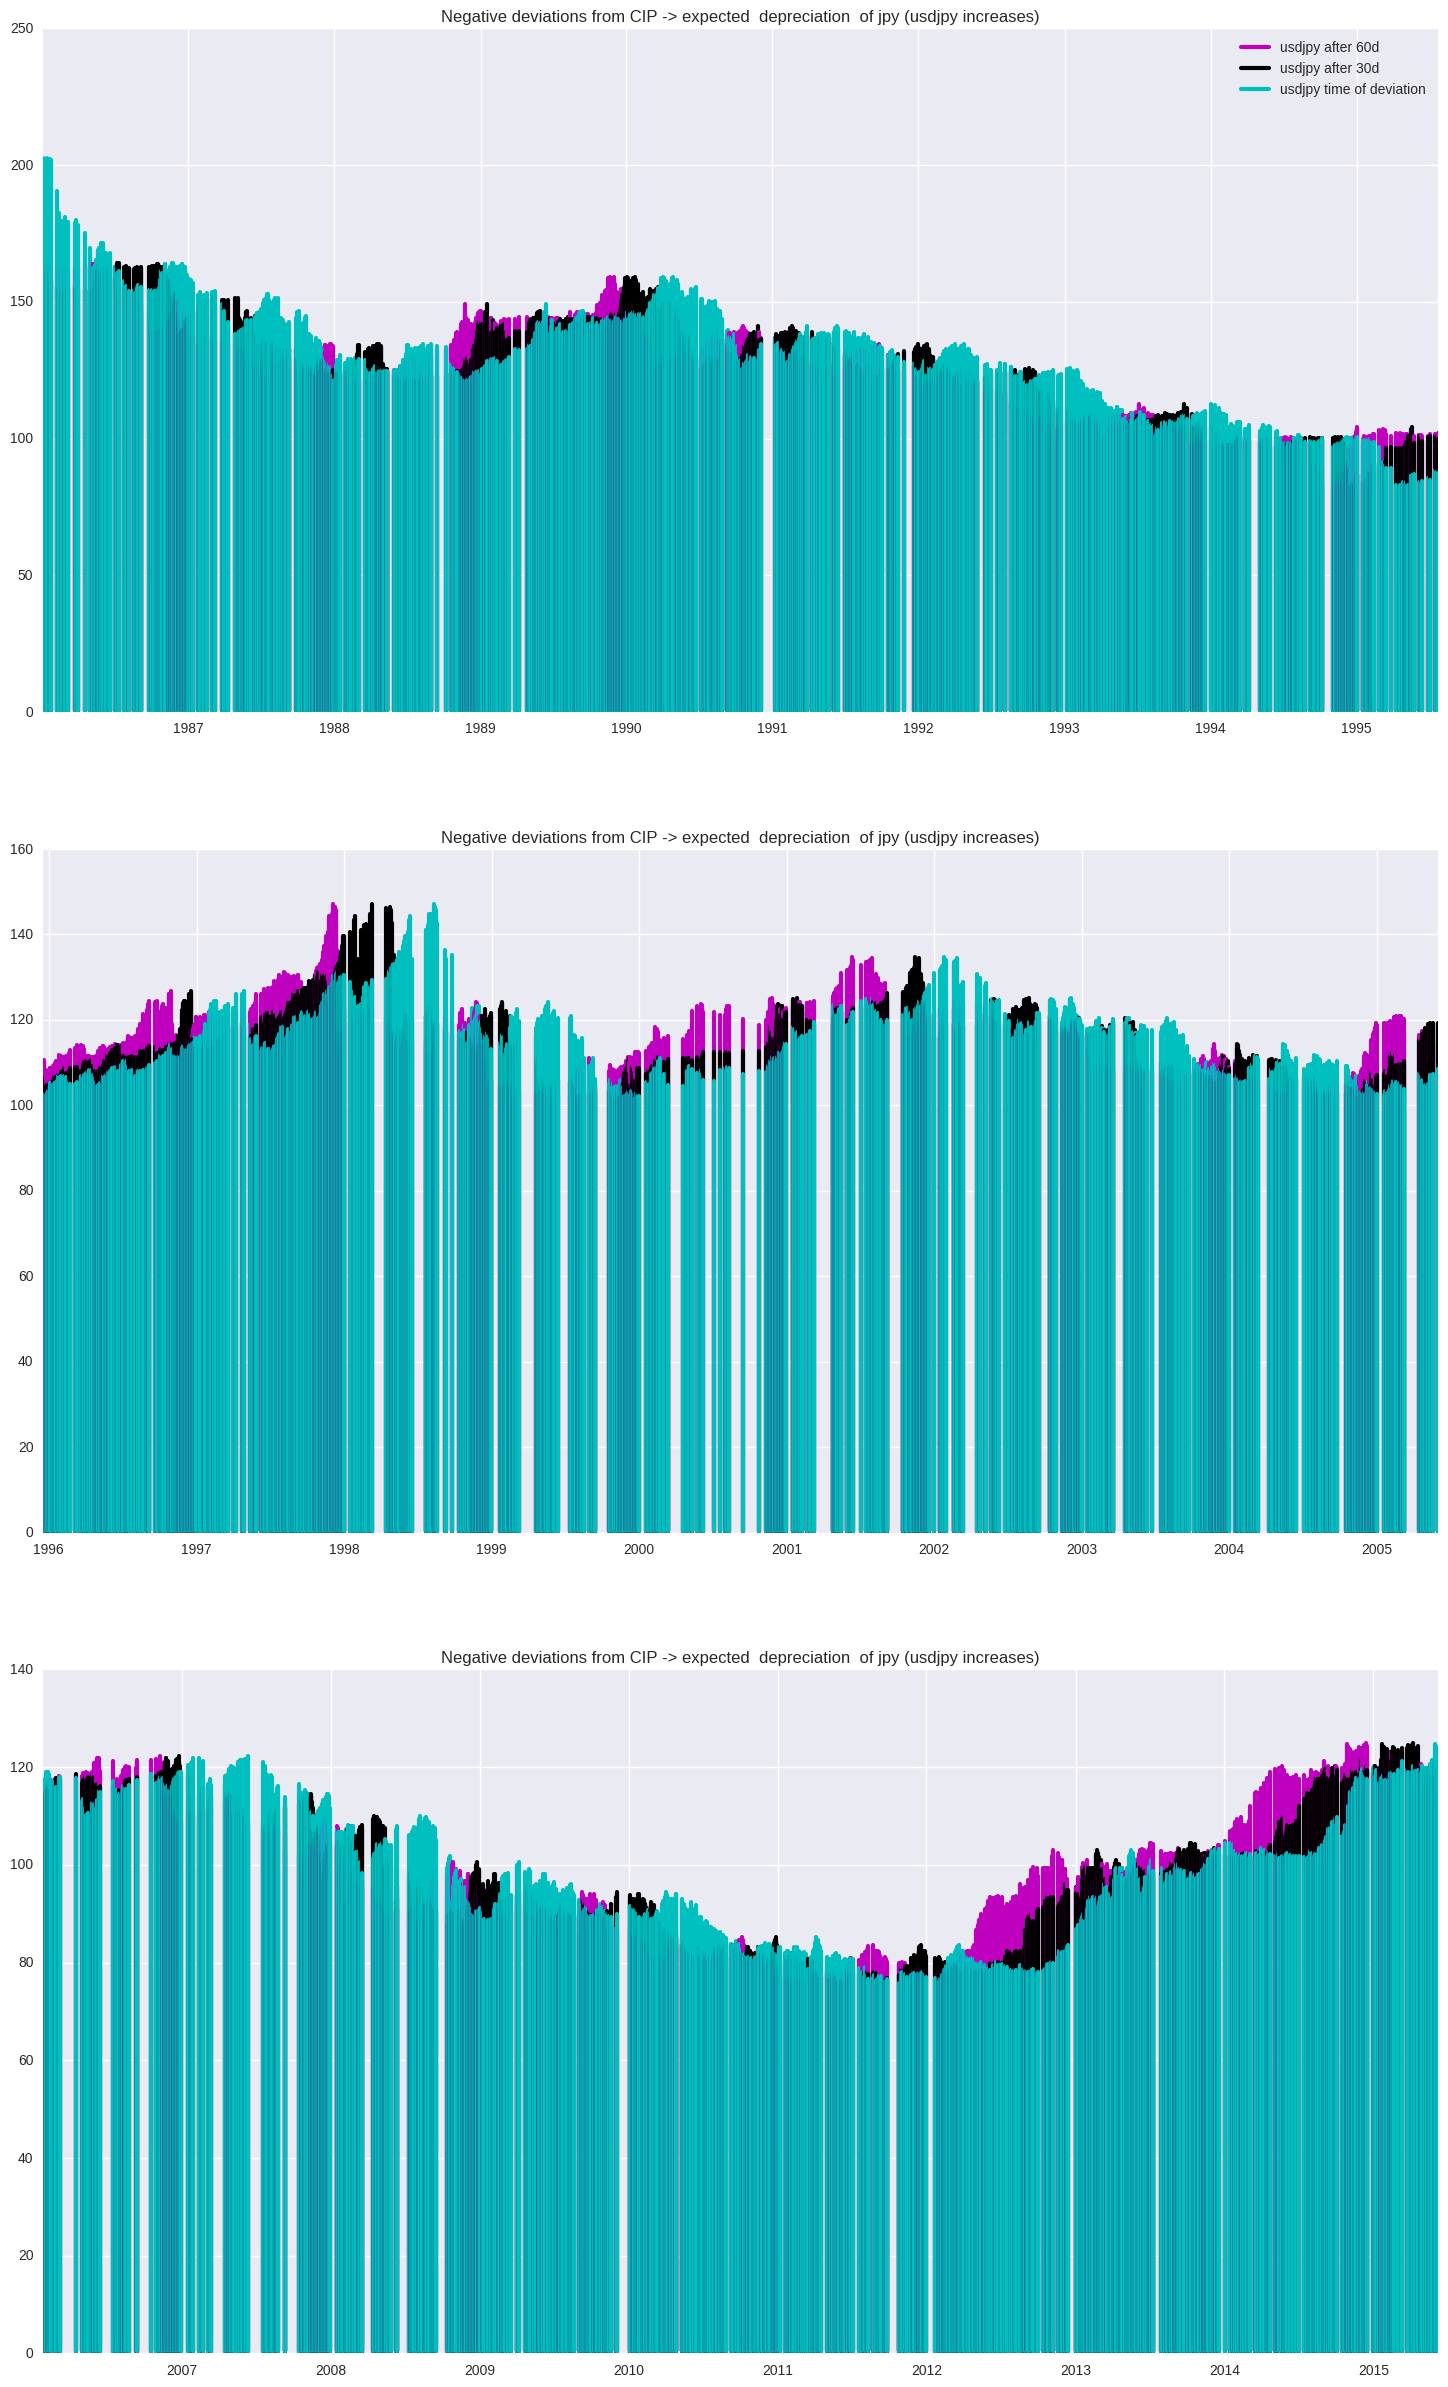

In [61]:
spot_reactions('usdjpy', -0.0001, df_usdjpy)

the number of observations which satisfy the given condition on deviation is 2659


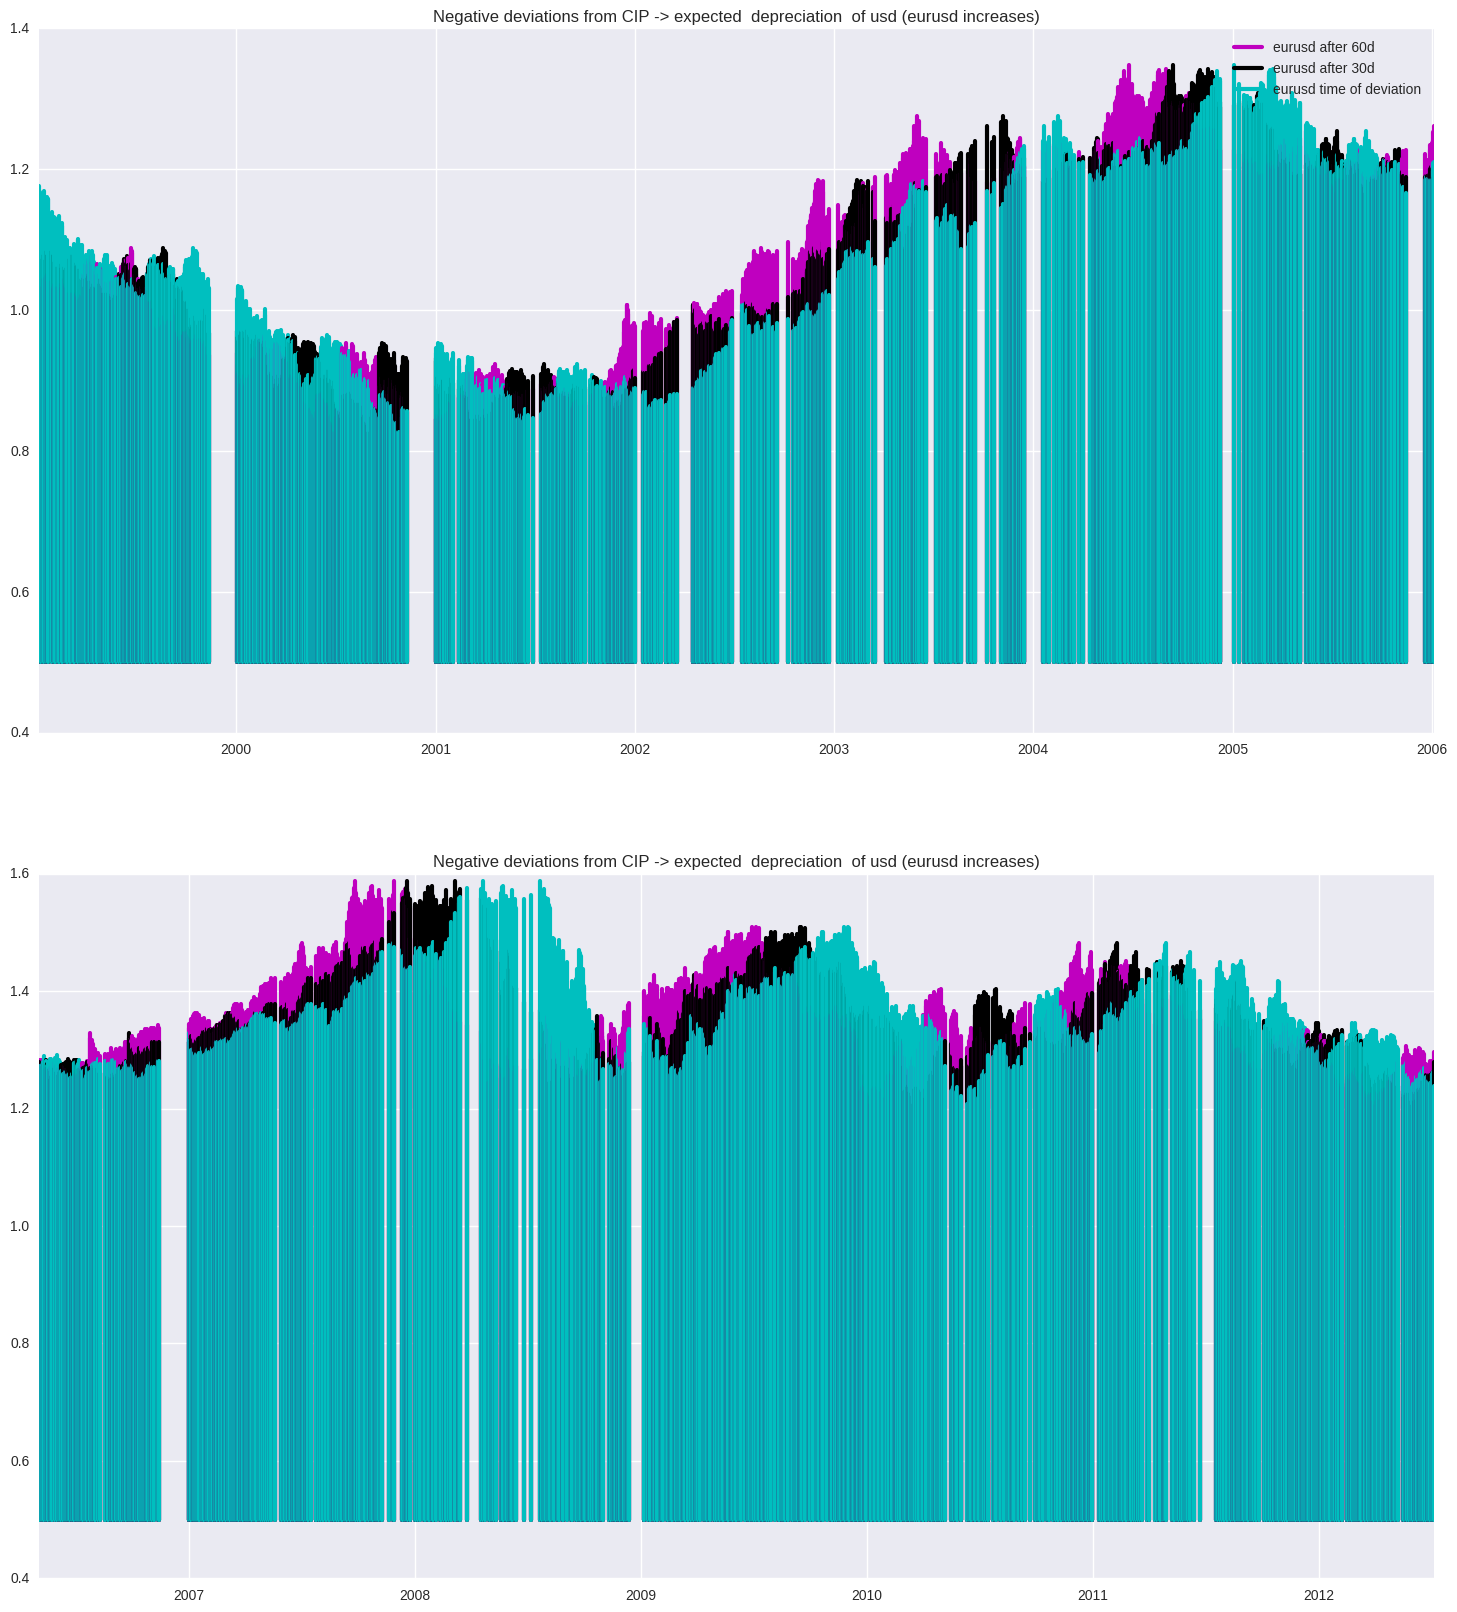

In [62]:
# And for EURUSD?
spot_reactions('eurusd', -0.0001, df_eurusd)

the number of observations which satisfy the given condition on deviation is 1902


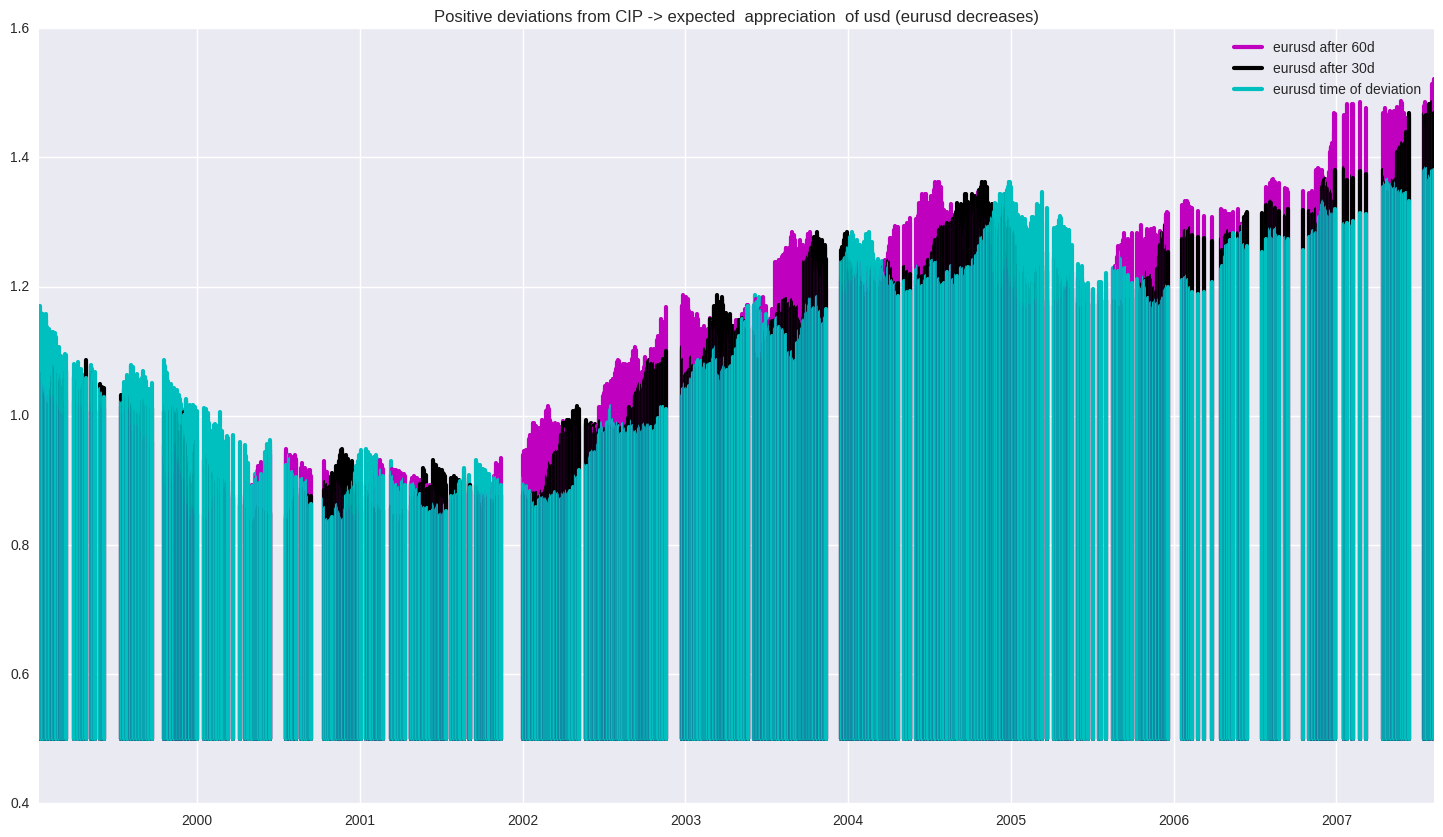

In [63]:
spot_reactions('eurusd', 0.0001, df_eurusd)

Well, the results aren't neither bad nor exactly comforting: too many times relatively wide timeframes behave against the theoretic assumptions. I'll need some smart machine learning to steer my profits through this mess....

Thanks God merciful people have written **scikit-learn**

***
***

## * * *
# But first...
## * * *

### I want to try how well a RandomForestRegressor predicts the next day variation in the spot exchange rate USING ONLY THE ORIGINAL INFORMATION

+ I define indices for train, validation, test partitions of this dataset with raw data

+ The first step is to do hyper-parameters tuning for the RandomForestRegressor. A GridSearch cross-validation is used on the test and validation partitions to achieve it. 

+ Then a RandomForestRegressor with the tuned parameters is fitted on the finalTrain (train + validation) partition and I'll show the MSE obtained on the test partition (last 3 years)

In [73]:
from sklearn import tree
from sklearn import metrics
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint as sp_randint

def mse(yval_pred, yval):
  val_mse = metrics.mean_squared_error(yval_pred, yval)
  return(val_mse)

def RandomForestReg(pair, df):
    np.random.seed(0) #important
    
    df=df.dropna()
    
    indicesTrain = np.where(df.index <= '2007')[0]
    indicesVal = np.where((df.index > '2007') & (df.index < '2011'))[0]
    indicesTest = np.where(df.index >= '2011')[0]
    indicesTrainFin = np.where(df.index < '2011')[0]

    partitions = [(indicesTrain, indicesVal)]

    param_grid = {'splitter' : ('best', 'random'),
                 'max_features' : ('log2', 'sqrt', 'auto'),
                 'max_depth' : range(1,20,1),
                 'min_samples_split' : range(2,10,1),
                 'min_samples_leaf' : range(1,20,1)
                 }

    grid_clf = GridSearchCV(tree.DecisionTreeRegressor(), 
                       param_grid = param_grid,
                       scoring = 'neg_mean_squared_error',
                       cv = partitions,
                       verbose = 1, n_jobs = -1)
    
    grid_clf.fit(df.ix[:,[0,1,2,3,4,5,6,7,12]].as_matrix(), df.ix[:,pair+'_nextDayChange'])

    print "Best hyper-parameters are: {} they give a MSE of: {}".format(grid_clf.best_params_, -grid_clf.best_score_)

    
    clf = tree.DecisionTreeRegressor(max_features= grid_clf.best_params_['max_features'],
                                     min_samples_split=grid_clf.best_params_['min_samples_split'], 
                                     splitter=grid_clf.best_params_['splitter'],
                                     max_depth=grid_clf.best_params_['max_depth'], 
                                     min_samples_leaf=grid_clf.best_params_['min_samples_leaf'])

    x = df.ix[:,[0,1,2,3,4,5,6,7,12]].as_matrix()
    y = df[pair+'_nextDayChange'].as_matrix() # slipped next day spot

    xTrain = x[indicesTrainFin-1]
    yTrain = y[indicesTrainFin-1]
    xTest = x[indicesTest-1]
    yTest = y[indicesTest-1]

    clf.fit(xTrain,yTrain)

    yPred = clf.predict(xTest)

    print "\nMSE for final classifier on test is %s" %(mse(yPred, yTest))
    
    return pd.concat([pd.DataFrame(yTest, columns=[pair+'_nextDayChange']), pd.DataFrame(yPred, columns=['RFpred_'+pair+'_nextDayChange'])], axis=1).head()

In [74]:
RandomForestReg('gbpusd',df_gbpusd)

Fitting 1 folds for each of 17328 candidates, totalling 17328 fits


[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 4978 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 11978 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 17328 out of 17328 | elapsed:   59.1s finished


Best hyper-parameters are: {'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 2} they give a MSE of: 5.91421455991e-05

MSE for final classifier on test is 0.000107863891883


,gbpusd_nextDayChange,RFpred_gbpusd_nextDayChange
0,0.006367,0.00039
1,0.006198,0.00039
2,-0.005710,0.00039
3,-0.000452,0.00039
4,0.004519,0.00039


# 4. Let's Play - Machine Learning Regressions

## a) Scikit-learn

### RandomForestRegressor & GradientBoostingRegressor

I define two functions which take a pair of currencies and the relative df as arguments:

+ RandomForestReg performs a GridSearchCV to discover the best params for a RandomForestRegressor

+ GradientBoostingReg performs a RandomizedSearch to discover the best params for a GradientBoostingRegressor

Finally both the functions return a pandas df containing as first column the real values of y_test, as second column the predicted values.

The predicted variable is the **next day's** value of the spot exchange rate between the two currencies.

In [75]:
from sklearn import tree
from sklearn import metrics
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint as sp_randint

def mse(yval_pred, yval):
  val_mse = metrics.mean_squared_error(yval_pred, yval)
  return(val_mse)

def RandomForestReg(pair, df):
    np.random.seed(0) #important
    
    df=df.dropna()
    
    indicesTrain = np.where(df.index <= '2007')[0]
    indicesVal = np.where((df.index > '2007') & (df.index < '2011'))[0]
    indicesTest = np.where(df.index >= '2011')[0]
    indicesTrainFin = np.where(df.index < '2011')[0]

    partitions = [(indicesTrain, indicesVal)]

    param_grid = {'splitter' : ('best', 'random'),
                 'max_features' : ('log2', 'sqrt', 'auto'),
                 'max_depth' : range(1,20,1),
                 'min_samples_split' : range(2,10,1),
                 'min_samples_leaf' : range(1,20,1)
                 }

    grid_clf = GridSearchCV(tree.DecisionTreeRegressor(), 
                       param_grid = param_grid,
                       scoring = 'neg_mean_squared_error',
                       cv = partitions,
                       verbose = 1, n_jobs = -1)
    
    # naturally pair_change column is omitted
    grid_clf.fit(df.ix[:, df.columns != pair+'_nextDaychange'].as_matrix(), df.ix[:,pair+'_nextDayChange'])

    print "Best hyper-parameters are: {} they give a MSE of: {}".format(grid_clf.best_params_, -grid_clf.best_score_)

    
    clf = tree.DecisionTreeRegressor(max_features= grid_clf.best_params_['max_features'],
                                     min_samples_split=grid_clf.best_params_['min_samples_split'], 
                                     splitter=grid_clf.best_params_['splitter'],
                                     max_depth=grid_clf.best_params_['max_depth'], 
                                     min_samples_leaf=grid_clf.best_params_['min_samples_leaf'])

    x = df.ix[:, df.columns != pair+'_nextDaychange'].as_matrix()
    y = df[pair+'_nextDayChange'].as_matrix() # slipped next day spot

    xTrain = x[indicesTrainFin-1]
    yTrain = y[indicesTrainFin-1]
    xTest = x[indicesTest-1]
    yTest = y[indicesTest-1]

    clf.fit(xTrain,yTrain)

    yPred = clf.predict(xTest)

    print "\nMSE for final classifier on test is %s" %(mse(yPred, yTest))
    
    return pd.concat([pd.DataFrame(yTest, columns=[pair+'_nextDayChange']), pd.DataFrame(yPred, columns=['RFpred_'+pair+'_nextDayChange'])], axis=1)

############################################################################################################
    
def GradientBoostingReg(pair, df):
    
    df=df.dropna()
    
    np.random.seed(0)

    indicesTrain = np.where(df.index <= '2007')[0]
    indicesVal = np.where((df.index > '2007') & (df.index < '2011'))[0]
    indicesTest = np.where(df.index >= '2011')[0]
    indicesTrainFin = np.where(df.index < '2011')[0]
    
    partitions = [(indicesTrain, indicesVal)]

    param_dist = {'n_estimators' : sp_randint(25,125)}

    n_iter_search = 150 #Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.

    rs_gb = RandomizedSearchCV(GradientBoostingRegressor(), 
                                       param_distributions=param_dist,
                                       scoring='neg_mean_squared_error',
                                       cv=partitions ,
                                       n_jobs=-1, verbose=1,
                                       n_iter=n_iter_search)

    rs_gb.fit(df.ix[:, df.columns != pair+'_nextDaychange'].as_matrix(), df.ix[:, pair+'_nextDayChange'])

    print "Best hyper-parameters are: {} they give a MAE of: {}".format(rs_gb.best_params_, -rs_gb.best_score_)
    
    clf = GradientBoostingRegressor(n_estimators=rs_gb.best_params_['n_estimators'])

    x = df.ix[:, df.columns != pair+'_nextDayChange'].as_matrix()
    y = df[pair+'_nextDayChange'].as_matrix()

    xTrain = x[indicesTrainFin-1]
    yTrain = y[indicesTrainFin-1]
    xTest = x[indicesTest-1]
    yTest = y[indicesTest-1]

    clf.fit(xTrain,yTrain)

    yPred = clf.predict(xTest)

    print "\nMSE for final classifier on test is %s" %(mse(yPred, yTest))
    
    return pd.concat([pd.DataFrame(yTest, columns=[pair+'_nextDayChange']), pd.DataFrame(yPred, columns=['GBpred_'+pair+'_nextDayChange'])], axis=1)


In [76]:
rf_results = RandomForestReg('gbpusd',df_gbpusd)
rf_results.head()

Fitting 1 folds for each of 17328 candidates, totalling 17328 fits


[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 5368 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 12868 tasks      | elapsed:   44.1s


Best hyper-parameters are: {'max_features': 'auto', 'min_samples_split': 3, 'splitter': 'random', 'max_depth': 14, 'min_samples_leaf': 1} they give a MSE of: 3.05022571857e-06

MSE for final classifier on test is 6.31091350896e-07


[Parallel(n_jobs=-1)]: Done 17328 out of 17328 | elapsed:  1.0min finished


,gbpusd_nextDayChange,RFpred_gbpusd_nextDayChange
0,0.006367,0.006146
1,0.006198,0.006146
2,-0.005710,-0.005762
3,-0.000452,-0.000049
4,0.004519,0.004561


In [101]:
gb_results = GradientBoostingReg('usdjpy',df_usdjpy)
gb_results.head()

Fitting 1 folds for each of 150 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.0s finished


Best hyper-parameters are: {'n_estimators': 107} they give a MAE of: 1.2184196336e-07

MSE for final classifier on test is 4.56025426427e-05


,usdjpy_nextDayChange,RFpred_usdjpy_nextDayChange
0,-0.001347,-0.000298
1,0.004904,-0.005122
2,0.015373,-0.001575
3,-0.000841,-0.000088
4,-0.001323,-0.000440


***

### Then,  let's see if it works

In [6]:
def nextfwd(pair,df):
    "pair must be a string, df is the pandasdf where data for that pair are stored"
    # forward THE FOLLOWING DAY -> it will be my Y
    for i in range(0,len(df.index)-1):
        df.set_value(df.index[i],pair+'_nextFWD', df.ix[df.index[i+1],'fw_'+pair])

    return None

In [7]:
nextfwd('gbpusd',df_gbpusd)
df_gbpusd = df_gbpusd.dropna()

In [8]:
df_gbpusd[1:10]

,gbpusd,libor 1m gbp,libor 1m usd,libor 3m gbp,libor 3m usd,libor 1w gbp,libor 1w usd,fw_gbpusd,cip_dev_gbpusd,r_usd,r_gbp,delta_cip_dev_gbpusd,gbpusd_prevDayChange,gbpusd_nextDayChange,gbpusd_nextFWD
1997-12-03,1.6840,7.56250,6.00000,7.75000,5.93750,7.31250,5.68750,1.6748,-0.007056,0.042436,0.055257,0.000268,0.001368,-0.008017,1.6586
1997-12-04,1.6705,7.58594,6.00000,7.75000,5.93750,7.43750,5.67578,1.6586,-0.005353,0.042601,0.055473,0.001703,-0.008017,-0.007183,1.6484
1997-12-05,1.6585,7.56250,5.96875,7.75000,5.90625,7.27344,5.65234,1.6484,-0.006717,0.042542,0.055689,-0.001364,-0.007183,-0.006813,1.6384
1997-12-08,1.6472,7.53906,6.00000,7.74219,5.93750,7.25000,5.62500,1.6384,-0.007377,0.043260,0.056280,-0.000660,-0.006813,0.003400,1.6436
1997-12-09,1.6528,7.50781,6.00000,7.75000,5.93750,7.25000,5.62500,1.6436,-0.007246,0.043425,0.056553,0.000131,0.003400,-0.001997,1.6430
1997-12-10,1.6495,7.50000,6.00000,7.74609,5.93750,7.18750,5.62500,1.6430,-0.008986,0.043590,0.056740,-0.001740,-0.001997,0.003456,1.6496
1997-12-11,1.6552,7.50391,5.98047,7.72656,5.93750,7.31250,5.62500,1.6496,-0.009484,0.043755,0.056814,-0.000498,0.003456,-0.003081,1.6428
1997-12-12,1.6501,7.50000,5.96484,7.72656,5.90625,7.22656,5.62500,1.6428,-0.008663,0.043690,0.057030,0.000821,-0.003081,-0.010181,1.6428
1997-12-15,1.6333,7.50391,5.96094,7.71875,5.90625,7.31250,5.62500,1.6428,-0.019487,0.043690,0.057030,-0.010824,-0.010181,-0.000429,1.6428


In [9]:
from sklearn import tree
from sklearn import metrics
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint as sp_randint

def mse(yval_pred, yval):
  val_mse = metrics.mean_squared_error(yval_pred, yval)
  return(val_mse)

def RandomForestReg(pair, df):
    np.random.seed(0) #important
    
    df=df.dropna()
    
    indicesTrain = np.where(df.index <= '2007')[0]
    indicesVal = np.where((df.index > '2007') & (df.index < '2011'))[0]
    indicesTest = np.where(df.index >= '2011')[0]
    indicesTrainFin = np.where(df.index < '2011')[0]

    partitions = [(indicesTrain, indicesVal)]

    param_grid = {'splitter' : ('best', 'random'),
                 'max_features' : ('log2', 'sqrt', 'auto'),
                 'max_depth' : range(1,20,1),
                 'min_samples_split' : range(2,10,1),
                 'min_samples_leaf' : range(1,20,1)
                 }

    grid_clf = GridSearchCV(tree.DecisionTreeRegressor(), 
                       param_grid = param_grid,
                       scoring = 'neg_mean_squared_error',
                       cv = partitions,
                       verbose = 1, n_jobs = -1)
    
    grid_clf.fit(df.ix[:,[0,1,2,3,4,5,6,7,8,9,10,11]].as_matrix(), df.ix[:,pair+'_nextFWD'])

    print "Best hyper-parameters are: {} they give a MSE of: {}".format(grid_clf.best_params_, -grid_clf.best_score_)

    
    clf = tree.DecisionTreeRegressor(max_features= grid_clf.best_params_['max_features'],
                                     min_samples_split=grid_clf.best_params_['min_samples_split'], 
                                     splitter=grid_clf.best_params_['splitter'],
                                     max_depth=grid_clf.best_params_['max_depth'], 
                                     min_samples_leaf=grid_clf.best_params_['min_samples_leaf'])

    x = df.ix[:,[0,1,2,3,4,5,6,7,8,9,10,11]].as_matrix()
    y = df[pair+'_nextFWD'].as_matrix() # slipped next day spot

    xTrain = x[indicesTrainFin-1]
    yTrain = y[indicesTrainFin-1]
    xTest = x[indicesTest-1]
    yTest = y[indicesTest-1]

    clf.fit(xTrain,yTrain)

    yPred = clf.predict(xTest)

    print "\nMSE for final classifier on test is %s" %(mse(yPred, yTest))
    
    return pd.concat([pd.DataFrame(yTest, columns=[pair+'_nextFWD']), pd.DataFrame(yPred, columns=['RFpred_'+pair+'_nextFWD'])], axis=1).head()

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
RandomForestReg('gbpusd',df_gbpusd)

Fitting 1 folds for each of 17328 candidates, totalling 17328 fits


[Parallel(n_jobs=-1)]: Done 1150 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6550 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 15550 tasks      | elapsed:   52.5s


Best hyper-parameters are: {'max_features': 'auto', 'min_samples_split': 3, 'splitter': 'random', 'max_depth': 9, 'min_samples_leaf': 1} they give a MSE of: 0.000592156358311

MSE for final classifier on test is 0.000347311036001


[Parallel(n_jobs=-1)]: Done 17328 out of 17328 | elapsed:   59.2s finished


,gbpusd_nextFWD,RFpred_gbpusd_nextFWD
0,1.5483,1.565215
1,1.5573,1.539374
2,1.5485,1.565215
3,1.5461,1.539374
4,1.5541,1.539374


***

### a.2) classification?

Down here I'm creaing a new column named pair_nextDaymove

In [6]:
def spot_nextDaymove(pair, df):
    "pair must be a string, df is the pandasdf where data for that pair are stored"
    for i in range(60,len(df.index)):
        if df.ix[df.index[i],pair+'_nextDaychange']<np.percentile(df.ix[df.index[i-60]:df.index[i],pair+'_nextDaychange'],25):
            df.set_value(df.index[i],pair+'_nextDaymove', -2)
        elif df.ix[df.index[i],pair+'_nextDaychange']<np.percentile(df.ix[df.index[i-60]:df.index[i],pair+'_nextDaychange'],50):
            df.set_value(df.index[i],pair+'_nextDaymove', -1)
        elif df.ix[df.index[i],pair+'_nextDaychange']==np.percentile(df.ix[df.index[i-60]:df.index[i],pair+'_nextDaychange'],50):
            df.set_value(df.index[i],pair+'_nextDaymove', 0)
        elif df.ix[df.index[i],pair+'_nextDaychange']>np.percentile(df.ix[df.index[i-60]:df.index[i],pair+'_nextDaychange'],75):
            df.set_value(df.index[i],pair+'_nextDaymove', 2)
        elif df.ix[df.index[i],pair+'_nextDaychange']>np.percentile(df.ix[df.index[i-60]:df.index[i],pair+'_nextDaychange'],50):
            df.set_value(df.index[i],pair+'_nextDaymove', 1)
    for i in range(0,60):
        if df.ix[df.index[i],pair+'_nextDaychange']<np.percentile(df.ix[df.index[0]:df.index[59],pair+'_nextDaychange'],25):
            df.set_value(df.index[i],pair+'_nextDaymove', -2)
        elif df.ix[df.index[i],pair+'_nextDaychange']<np.percentile(df.ix[df.index[0]:df.index[59],pair+'_nextDaychange'],50):
            df.set_value(df.index[i],pair+'_nextDaymove', -1)
        elif df.ix[df.index[i],pair+'_nextDaychange']==np.percentile(df.ix[df.index[0]:df.index[59],pair+'_nextDaychange'],50):
            df.set_value(df.index[i],pair+'_nextDaymove', 0)
        elif df.ix[df.index[i],pair+'_nextDaychange']>np.percentile(df.ix[df.index[0]:df.index[59],pair+'_nextDaychange'],75):
            df.set_value(df.index[i],pair+'_nextDaymove', 2)
        elif df.ix[df.index[i],pair+'_nextDaychange']>np.percentile(df.ix[df.index[0]:df.index[59],pair+'_nextDaychange'],50):
            df.set_value(df.index[i],pair+'_nextDaymove', 1)

spot_nextDaymove('eurusd', df_eurusd)
spot_nextDaymove('gbpusd', df_gbpusd)
spot_nextDaymove('usdjpy', df_usdjpy)

***

## b) Using Spark

In [168]:
import sys
import os
import os.path

SPARK_HOME ="/home/gio/spark-2.1.0-bin-hadoop2.7/" #CHANGE THIS PATH TO YOURS!

sys.path.append(os.path.join(SPARK_HOME, "python", "lib", "py4j-0.10.4-src.zip")) #BEWARE WITH py4j version!!
sys.path.append(os.path.join(SPARK_HOME, "python", "lib", "pyspark.zip"))
os.environ["SPARK_HOME"] = SPARK_HOME

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler 
from pyspark.ml.regression import DecisionTreeRegressor # Spark DecisionTree for regressions
from pyspark.ml.evaluation import RegressionEvaluator # Evaluator

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()
    
sc = spark.sparkContext

In [173]:
data_sd = spark.read.csv("/home/gio/findata/df_eurusd",header=True,inferSchema=True)

In [174]:
data_sd.show(1)

+--------------------+------+------------+------------+------------+------------+------------+------------+---------+---------------+--------------+--------------+--------------------+----------------+
|                 _c0|eurusd|libor 1m eur|libor 1m usd|libor 3m eur|libor 3m usd|libor 1w eur|libor 1w usd|fw_eurusd| cip_dev_eurusd|         r_usd|         r_eur|delta_cip_dev_eurusd|   eurusd_change|
+--------------------+------+------------+------------+------------+------------+------------+------------+---------+---------------+--------------+--------------+--------------------+----------------+
|1999-01-05 00:00:...| 1.176|        3.23|     5.05391|     3.21234|     5.06031|       3.245|     5.04906|    1.182|0.0598141987427|0.175787019765|0.110307984367|                 0.0|-0.0105442176871|
+--------------------+------+------------+------------+------------+------------+------------+------------+---------+---------------+--------------+--------------+--------------------+--------

**The following cells prepare the dataframe for ML use**

The algorithms in Spark ML library need a dataframe with just two columns: the first one (typically named _features_) must contain a matrix with the input attributes, the second one must contain the output attribute. In order to do that, _VectorAssembler_ is going to be used to put together all the input attributes.

In [176]:
ignore = ['eurusd_change', '_c0']

assembler = VectorAssembler(
    inputCols=['cip_dev_eurusd', 'delta_cip_dev_eurusd'],
    outputCol='features')

data_sd = assembler.transform(data_sd).select(['eurusd_change', 'features'])

In [27]:
# This is how the first rows of the dataframe look like
data_sd.show(truncate=False)

+-----------------+-----------------------------------+
|eurusd_var       |features                           |
+-----------------+-----------------------------------+
|-0.0106565830182 |[0.0606155043693,8.01305626595E-4] |
|0.00308430431803 |[0.0501644523327,-0.0104510520366] |
|-0.0102129132768 |[0.047038189206,-0.00312626312669] |
|-0.00173400381481|[0.0469563231943,-8.18660116675E-5]|
|0.00121233113959 |[0.0395914172351,-0.00736490595921]|
|0.0128227047359  |[0.0411767890358,0.00158537180063] |
|-7.69954658226E-4|[0.0328089153898,-0.00836787364597]|
|-0.00845483564835|[0.104381105476,0.0715721900863]   |
|0.0              |[0.09455503792,-0.00982606755607]  |
|0.00163652024117 |[0.094600198285,4.51603649227E-5]  |
|-0.00302375809935|[0.0913164485554,-0.0032837497296] |
|1.727563272E-4   |[0.0845227856223,-0.00679366293308]|
|4.31704368848E-4 |[0.0823929664497,-0.0021298191726] |
|-0.00138336503545|[0.0731885981261,-0.00920436832359]|
|9.50159799603E-4 |[0.0691600227559,-0.004028575

In [177]:
(trainingData_sd, testData_sd) = data_sd.randomSplit([0.7, 0.3])

**A decision tree with default parameters is trained.**

In [178]:
dt = DecisionTreeRegressor(labelCol='eurusd_change')
model= dt.fit(trainingData_sd)

**And predictions are computed on the test set.** The model is used to _transform_ the test dataset into a set of predictions.

In [179]:
predictions_sd = model.transform(testData_sd)
predictions_sd.show()

+----------------+--------------------+--------------------+
|   eurusd_change|            features|          prediction|
+----------------+--------------------+--------------------+
| -0.026530904919|[-0.0707530238492...|0.001121988207084...|
|-0.0263701201201|[0.0445164215449,...|-0.00162664635277...|
|-0.0222929936306|[-0.0402660914936...|0.002521108987821...|
| -0.021704118414|[-0.0602792292512...|0.001083018181560...|
|-0.0201477020148|[-0.0074969038259...|-0.00244720111748...|
|-0.0195191883547|[0.0708359560248,...|-2.41282747223872...|
|-0.0187315634218|[-0.0262991765899...|-0.00244720111748...|
|-0.0187004754358|[0.0149889145261,...|-0.00841446532014...|
|-0.0185746012518|[-0.0253320781606...|8.689060129534494E-4|
|-0.0183042789223|[-0.0245223280631...|-0.00244720111748...|
|-0.0180696342001|[0.0148131390044,...|-0.00109833520838...|
|-0.0176181602575|[0.00560027889875...|-3.80699800078094...|
|-0.0169561621175|[-0.0219715406178...|-9.41454254217708...|
|-0.0164549052281|[-0.05

**Finally, MAE is computed**

In [140]:
evaluator = RegressionEvaluator(labelCol="eurusd_change", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions_sd)
print(mse)

3.46341765736e-05
